<a href="https://colab.research.google.com/github/PRAVEENMK-GIT/Hotel_Bookings_Analysis/blob/main/Hotel_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Bookings Analysis

## Business Analyst Intern Technical Assignment

This notebook analyzes hotel booking data to identify trends, patterns in cancellations, and provide business recommendations.

## 1. Import Libraries and Load Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Improve plot appearance
plt.style.use('seaborn-v0_8-whitegrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Hotel_bookings_final.csv')

# Display first few rows of the data
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (30000, 24)


,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,booking_channel,booking_value,costprice,markup,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,Mobile App,19361.0,19361,5981,25342,PayPal,Yes,369.648995,Web,Confirmed,2024-03-04,5.374694,0.000000,No
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,Mobile App,6137.0,6137,1896,8033,Bank Transfer,Yes,492.505903,Web,Confirmed,2024-07-19,7.161033,0.000000,No
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,Web,22702.0,22702,7013,29715,Debit Card,Yes,0.000000,iOS,Confirmed,2024-03-22,0.000000,0.000000,No
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,Web,34068.0,34068,10524,44592,Bank Transfer,Yes,545.541516,Android,Confirmed,2024-11-24,7.932170,24.500442,Yes
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,Mobile App,12127.0,12127,3746,15873,Debit Card,Yes,211.367602,Web,Cancelled,2024-03-02,0.000000,0.000000,No


## 2. Data Exploration and Cleaning

In [ ]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [ ]:
# Check summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,30000.0,249.721767,145.484836,1.000000,123.0000,248.000000,376.000000,499.000000
property_id,30000.0,3.777533,2.081471,1.000000,1.0000,3.000000,5.000000,7.000000
star_rating,30000.0,3.602033,0.860241,2.000000,3.0000,4.000000,4.000000,5.000000
num_rooms_booked,30000.0,1.352333,0.574403,1.000000,1.0000,1.000000,2.000000,3.000000
booking_value,30000.0,25080.525454,11587.369335,1279.770000,15922.7125,24736.145000,33570.000000,67764.460000
costprice,30000.0,22541.494100,9259.520787,3822.000000,15088.7500,22731.000000,30427.000000,38200.000000
markup,30000.0,6963.324400,2860.106570,1181.000000,4661.7500,7021.500000,9399.000000,11800.000000
selling_price,30000.0,29504.818500,12119.627338,5003.000000,19750.5000,29752.500000,39826.000000,50000.000000
refund_amount,30000.0,320.938376,339.635396,0.000000,0.0000,221.141185,594.624344,1462.725105
cashback,30000.0,3.831534,4.783590,0.000000,0.0000,1.030180,7.378533,21.268013


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

,Missing Values,Percentage (%)
check_in_date,5468,18.226667
check_out_date,5468,18.226667


In [ ]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# Clean data as needed based on the findings

# Convert date columns to datetime format
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['travel_date'] = pd.to_datetime(df['travel_date'])

# Convert check-in and check-out dates to datetime
df['check_in_date'] = pd.to_datetime(df['check_in_date'], errors='coerce')
df['check_out_date'] = pd.to_datetime(df['check_out_date'], errors='coerce')

# Create a is_cancelled flag based on booking_status
df['is_cancelled'] = df['booking_status'].apply(lambda x: 1 if x == 'Cancelled' else 0)

# Create a column for length of stay (only for non-cancelled bookings with check-in/out dates)
df['length_of_stay'] = (df['check_out_date'] - df['check_in_date']).dt.days

# Create a column for lead time (days between booking and travel date)
df['lead_time'] = (df['travel_date'] - df['booking_date']).dt.days

# Extract time components for temporal analysis
df['booking_month'] = df['booking_date'].dt.month
df['booking_day_of_week'] = df['booking_date'].dt.dayofweek
df['booking_year'] = df['booking_date'].dt.year

df['travel_month'] = df['travel_date'].dt.month
df['travel_day_of_week'] = df['travel_date'].dt.dayofweek
df['travel_year'] = df['travel_date'].dt.year

# Create a profit column
df['profit'] = df['selling_price'] - df['costprice']

# Group star_rating into categories for easier analysis
df['star_category'] = pd.cut(df['star_rating'],
                            bins=[0, 2, 3, 4, 5],
                            labels=['Budget (1-2★)', 'Economy (3★)', 'Premium (4★)', 'Luxury (5★)'])

# Print some info about cancellations
cancellation_rate = df['is_cancelled'].mean() * 100
print(f"Overall cancellation rate: {cancellation_rate:.2f}%")

# Display the cleaned dataset
print(f"Cleaned dataset shape: {df.shape}")
df.head()

Overall cancellation rate: 20.23%
Cleaned dataset shape: (30000, 35)


,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,booking_channel,booking_value,costprice,markup,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,is_cancelled,length_of_stay,lead_time,booking_month,booking_day_of_week,booking_year,travel_month,travel_day_of_week,travel_year,profit,star_category
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,Mobile App,19361.0,19361,5981,25342,PayPal,Yes,369.648995,Web,Confirmed,2024-03-04,5.374694,0.000000,No,0,2.0,-28,4,0,2024,3,0,2024,5981,Premium (4★)
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,Mobile App,6137.0,6137,1896,8033,Bank Transfer,Yes,492.505903,Web,Confirmed,2024-07-19,7.161033,0.000000,No,0,7.0,109,4,0,2024,7,4,2024,1896,Economy (3★)
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,Web,22702.0,22702,7013,29715,Debit Card,Yes,0.000000,iOS,Confirmed,2024-03-22,0.000000,0.000000,No,0,5.0,-10,4,0,2024,3,4,2024,7013,Economy (3★)
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,Web,34068.0,34068,10524,44592,Bank Transfer,Yes,545.541516,Android,Confirmed,2024-11-24,7.932170,24.500442,Yes,0,6.0,237,4,0,2024,11,6,2024,10524,Premium (4★)
4,40,5,Seattle,5,2024-04-01,NaT,NaT,Deluxe,1,Leisure,Mobile App,12127.0,12127,3746,15873,Debit Card,Yes,211.367602,Web,Cancelled,2024-03-02,0.000000,0.000000,No,1,NaN,-30,4,0,2024,3,5,2024,3746,Luxury (5★)


## 3. Exploratory Data Analysis (EDA)

In [ ]:
# Get unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())


city: 10 unique values
city
Chicago          3059
Los Angeles      3040
Las Vegas        3035
San Francisco    3032
Orlando          3015
Name: count, dtype: int64

room_type: 3 unique values
room_type
Standard    16552
Deluxe      10478
Suite        2970
Name: count, dtype: int64

stay_type: 2 unique values
stay_type
Leisure     18110
Business    11890
Name: count, dtype: int64

booking_channel: 3 unique values
booking_channel
Web             15001
Mobile App      12009
Travel Agent     2990
Name: count, dtype: int64

payment_method: 4 unique values
payment_method
Debit Card       7603
PayPal           7584
Credit Card      7492
Bank Transfer    7321
Name: count, dtype: int64

refund_status: 2 unique values
refund_status
Yes    23512
No      6488
Name: count, dtype: int64

channel_of_booking: 3 unique values
channel_of_booking
Web        16023
Android     9505
iOS         4472
Name: count, dtype: int64

booking_status: 3 unique values
booking_status
Confirmed    21672
Cancelled     6

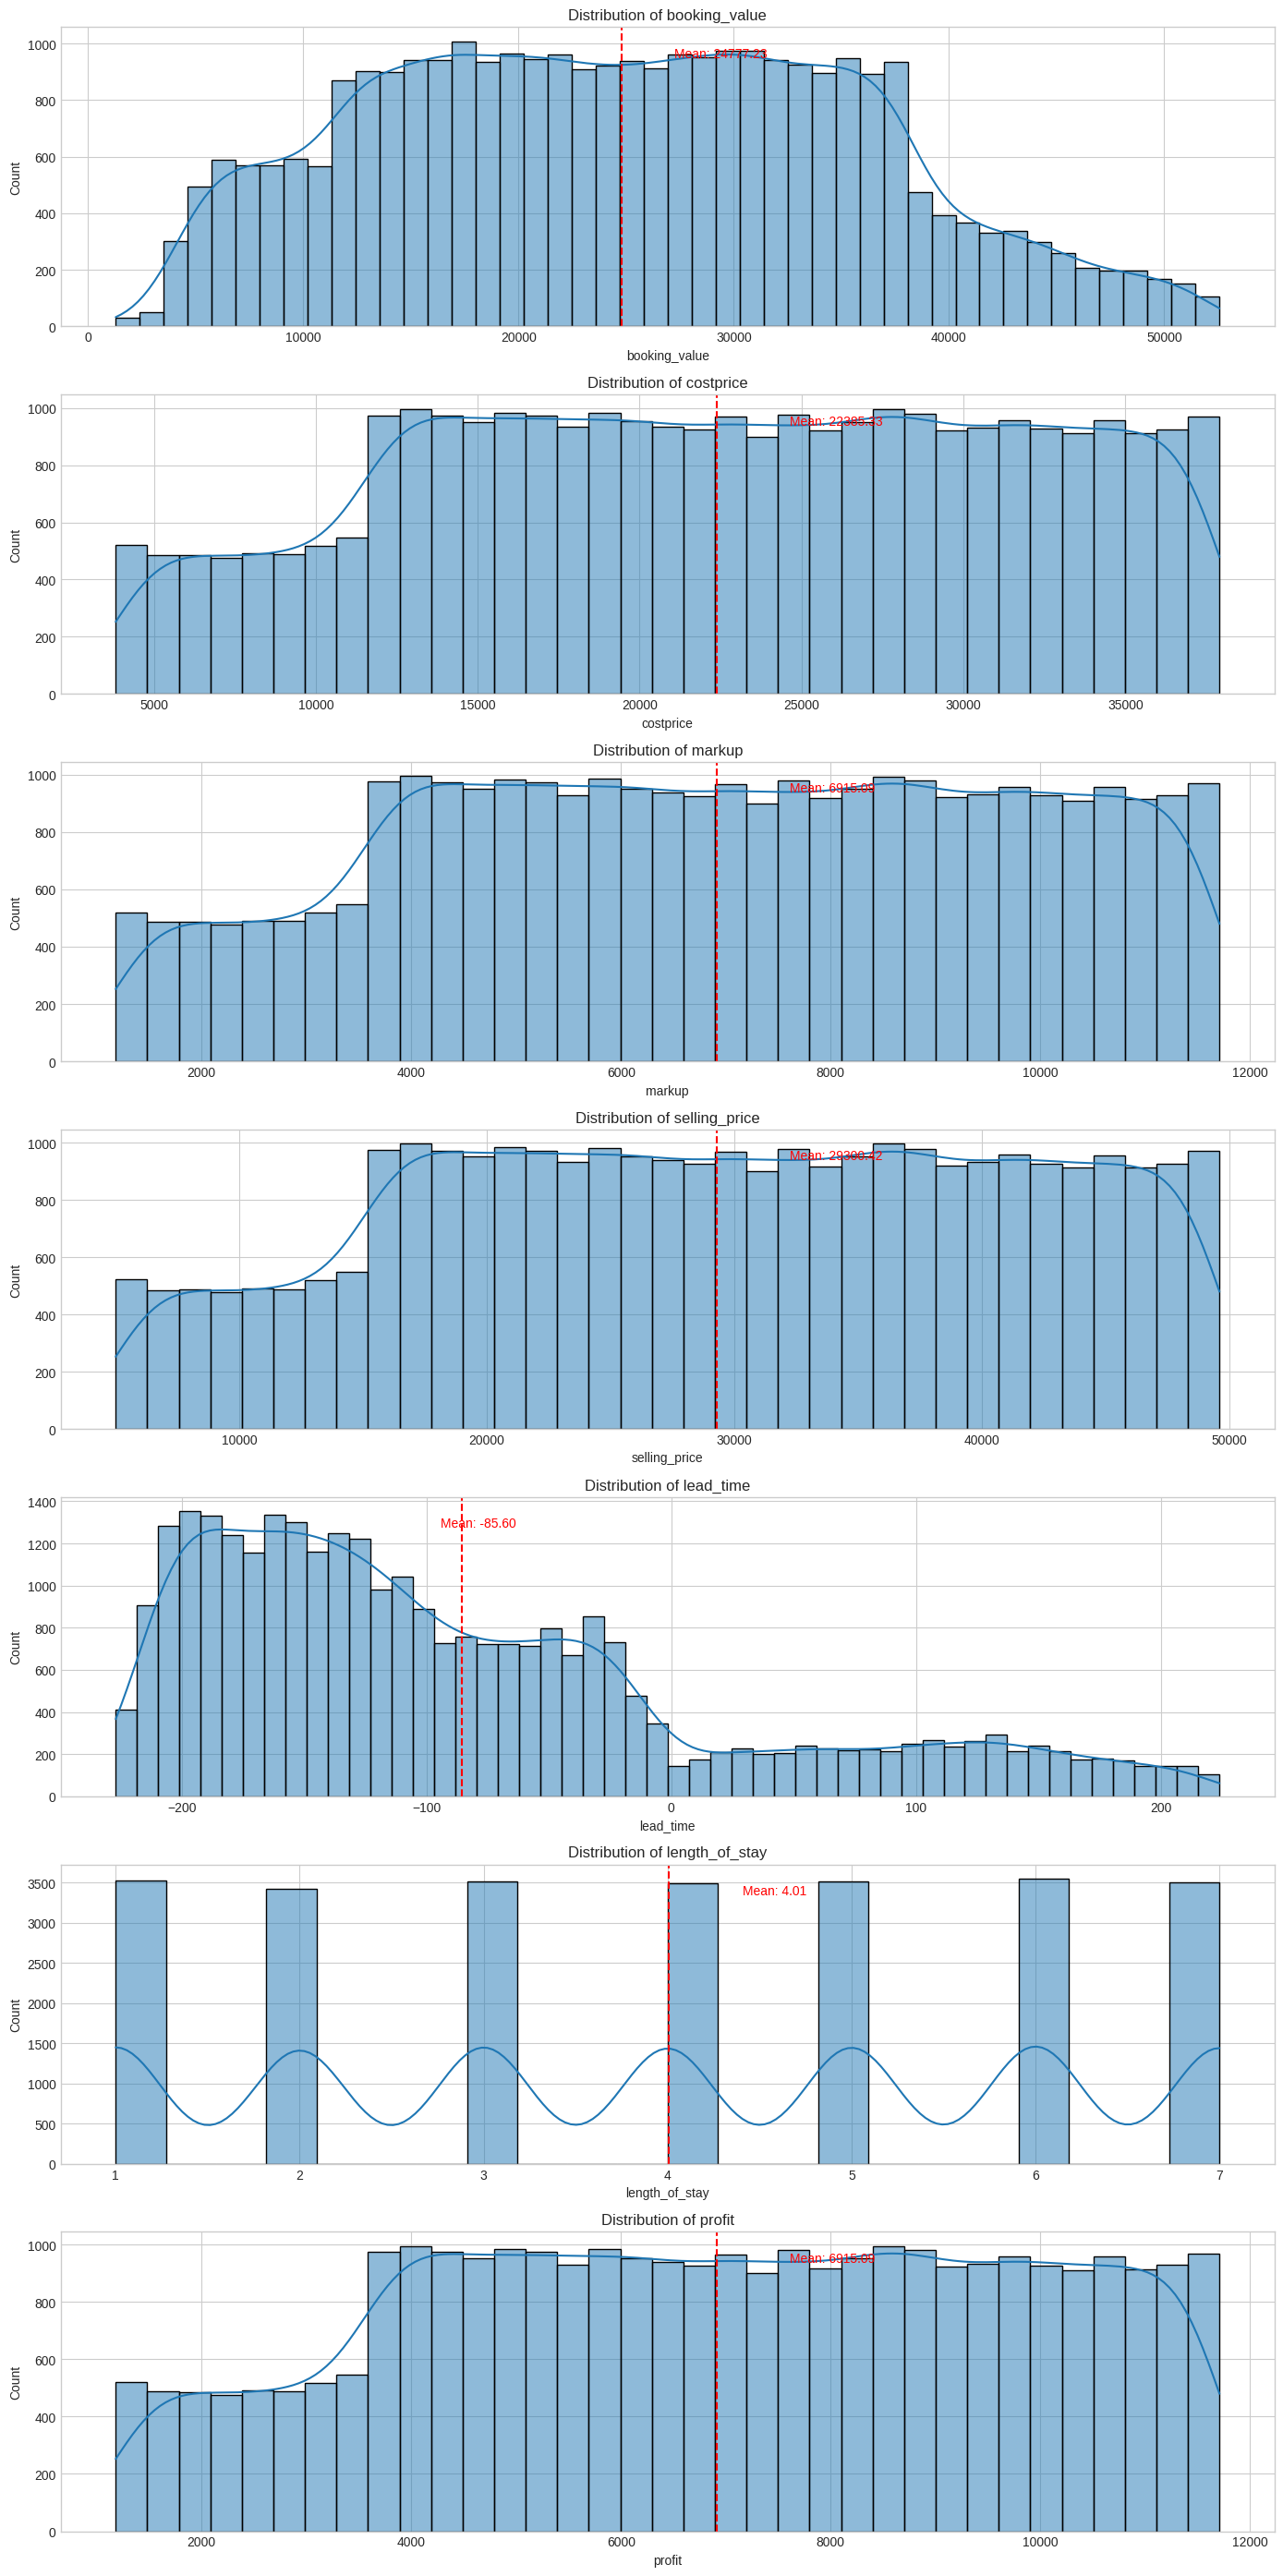

In [ ]:
# Visualize distribution of important numerical columns
numerical_cols = ['booking_value', 'costprice', 'markup', 'selling_price', 'lead_time', 'length_of_stay', 'profit']
selected_num_cols = numerical_cols  # Show all these important columns

fig, axes = plt.subplots(len(selected_num_cols), 1, figsize=(14, 4*len(selected_num_cols)))
for i, col in enumerate(selected_num_cols):
    # Remove extreme outliers for better visualization (keep 99% of data)
    upper_limit = df[col].quantile(0.99)
    plot_data = df[df[col] <= upper_limit][col]

    sns.histplot(plot_data, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

    # Add mean line
    mean_val = plot_data.mean()
    axes[i].axvline(mean_val, color='red', linestyle='--')
    axes[i].text(mean_val*1.1, axes[i].get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='red')

plt.tight_layout()
plt.show()

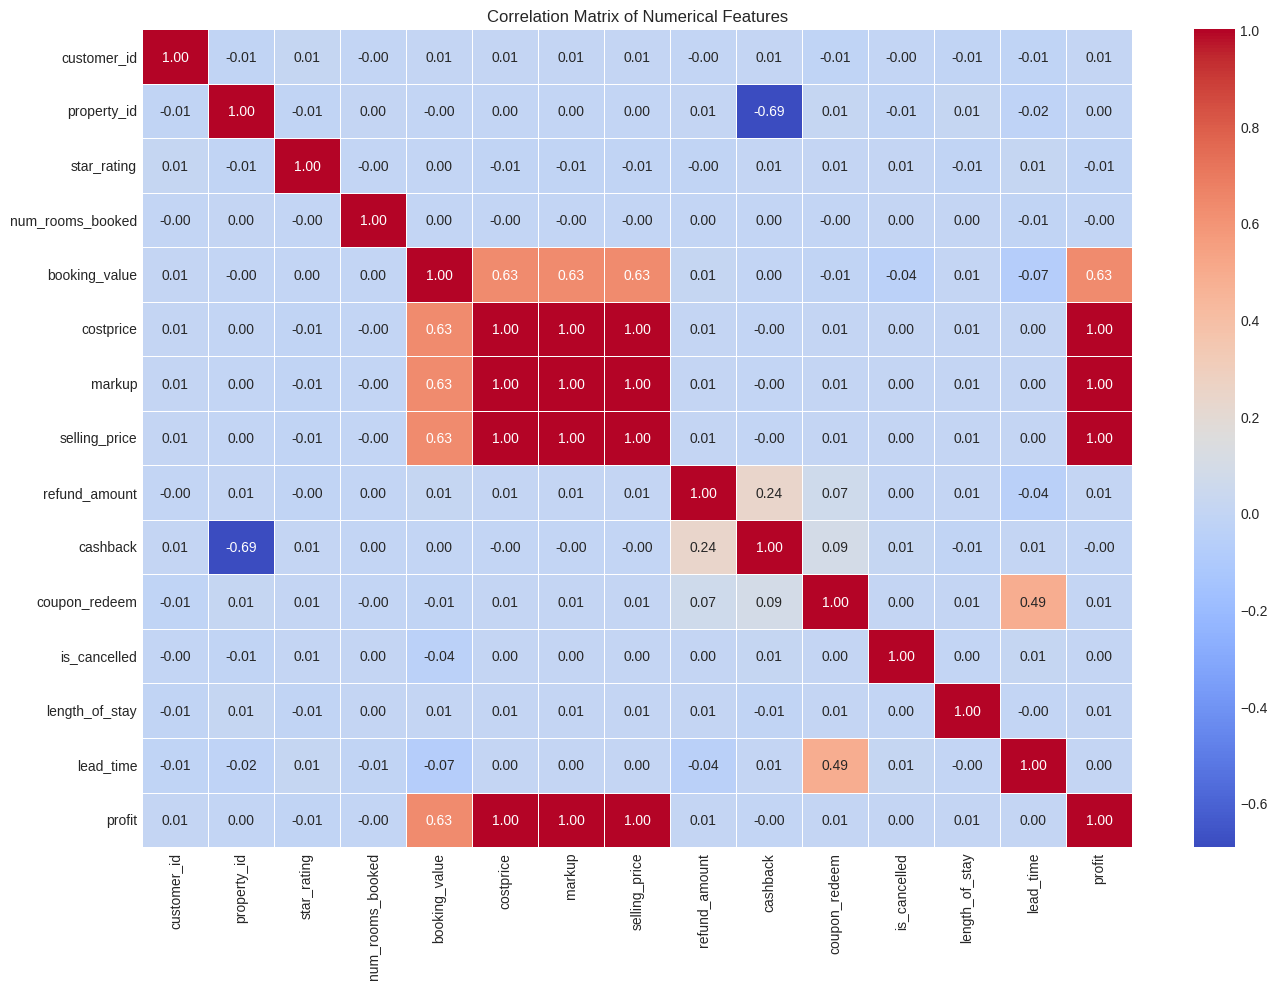

In [ ]:
# Correlation analysis
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## 4. Booking Patterns Analysis

In [ ]:
# Analysis by booking channel
channel_counts = df['booking_channel'].value_counts().reset_index()
channel_counts.columns = ['Channel', 'Count']

fig = px.pie(channel_counts, values='Count', names='Channel',
            title='Distribution of Bookings by Channel',
            hole=0.4,
            color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Average booking value by channel
channel_value = df.groupby('booking_channel')['booking_value'].mean().reset_index()
channel_value.columns = ['Channel', 'Average Booking Value']

fig = px.bar(channel_value, x='Channel', y='Average Booking Value',
            title='Average Booking Value by Channel',
            color='Channel',
            text_auto='.2f')
fig.show()

In [ ]:
# Analysis by room type
room_type_counts = df['room_type'].value_counts().reset_index()
room_type_counts.columns = ['Room Type', 'Count']

fig = px.bar(room_type_counts, x='Room Type', y='Count',
            title='Distribution of Bookings by Room Type',
            color='Room Type',
            color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

# Average booking value by room type
room_value = df.groupby('room_type')[['booking_value', 'profit']].mean().reset_index()

fig = px.bar(room_value, x='room_type', y=['booking_value', 'profit'],
            title='Average Booking Value and Profit by Room Type',
            barmode='group',
            labels={'value': 'Amount', 'variable': 'Metric', 'room_type': 'Room Type'},
            color_discrete_map={'booking_value': '#636EFA', 'profit': '#EF553B'})
fig.show()

In [ ]:
# Analysis by star rating
star_rating_counts = df['star_rating'].value_counts().sort_index().reset_index()
star_rating_counts.columns = ['Star Rating', 'Count']

fig = px.bar(star_rating_counts, x='Star Rating', y='Count',
            title='Distribution of Bookings by Hotel Star Rating',
            color='Star Rating',
            color_continuous_scale='Viridis')
fig.show()

# Average booking value by star rating
star_value = df.groupby('star_rating')[['booking_value', 'profit', 'markup']].mean().reset_index()

fig = px.line(star_value, x='star_rating', y=['booking_value', 'profit', 'markup'],
             title='Average Values by Star Rating',
             labels={'value': 'Amount', 'variable': 'Metric', 'star_rating': 'Star Rating'},
             markers=True)
fig.show()

# Cancellation rate by star rating
star_cancel = df.groupby('star_rating')['is_cancelled'].mean().reset_index()
star_cancel['Cancellation Rate'] = star_cancel['is_cancelled'] * 100
star_cancel.columns = ['Star Rating', 'Cancelled', 'Cancellation Rate']

fig = px.bar(star_cancel, x='Star Rating', y='Cancellation Rate',
            title='Cancellation Rate by Star Rating',
            color='Star Rating',
            text_auto='.1f')
fig.update_layout(yaxis_title='Cancellation Rate (%)')
fig.show()

In [ ]:
# Cross-analysis of channels by room types
channel_room_cross = pd.crosstab(df['booking_channel'], df['room_type'])

fig = px.imshow(channel_room_cross, text_auto=True, aspect="auto",
               title='Heatmap of Booking Channels vs Room Types',
               labels=dict(x="Room Type", y="Booking Channel", color="Count"),
               color_continuous_scale='Viridis')
fig.show()

# Cross-analysis of channels by star rating
channel_star_cross = pd.crosstab(df['booking_channel'], df['star_category'])

fig = px.imshow(channel_star_cross, text_auto=True, aspect="auto",
               title='Heatmap of Booking Channels vs Star Categories',
               labels=dict(x="Star Category", y="Booking Channel", color="Count"),
               color_continuous_scale='Plasma')
fig.show()

# Cross-analysis of stay type by booking channel
stay_channel_cross = pd.crosstab(df['stay_type'], df['booking_channel'])

fig = px.imshow(stay_channel_cross, text_auto=True, aspect="auto",
               title='Heatmap of Stay Type vs Booking Channel',
               labels=dict(x="Booking Channel", y="Stay Type", color="Count"),
               color_continuous_scale='Cividis')
fig.show()

## 5. Cancellation Behavior Analysis

In [ ]:
# Cancellation rate analysis
cancellation_counts = df['is_cancelled'].value_counts().reset_index()
cancellation_counts.columns = ['Cancelled', 'Count']
cancellation_counts['Cancelled'] = cancellation_counts['Cancelled'].map({0: 'Not Cancelled', 1: 'Cancelled'})

cancellation_rate = (df['is_cancelled'].sum() / len(df)) * 100

fig = px.pie(cancellation_counts, values='Count', names='Cancelled',
            title=f'Booking Cancellation Rate: {cancellation_rate:.2f}%',
            color_discrete_sequence=['#3CB371', '#FF6347'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Cancellation distribution by booking status
status_counts = df['booking_status'].value_counts().reset_index()
status_counts.columns = ['Booking Status', 'Count']

fig = px.pie(status_counts, values='Count', names='Booking Status',
           title='Distribution of Booking Status',
           color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
# Cancellation by booking channel
channel_cancel = df.groupby('booking_channel')['is_cancelled'].mean().sort_values(ascending=False).reset_index()
channel_cancel.columns = ['Booking Channel', 'Cancellation Rate']
channel_cancel['Cancellation Rate'] = channel_cancel['Cancellation Rate'] * 100

fig = px.bar(channel_cancel, x='Booking Channel', y='Cancellation Rate',
            title='Cancellation Rate by Booking Channel',
            color='Cancellation Rate',
            text_auto='.1f',
            color_continuous_scale='Reds')
fig.update_layout(yaxis_title='Cancellation Rate (%)')
fig.show()

# Booking value lost due to cancellations by channel
channel_lost_value = df[df['is_cancelled'] == 1].groupby('booking_channel')['booking_value'].agg(['sum', 'count']).reset_index()
channel_lost_value.columns = ['Booking Channel', 'Lost Booking Value', 'Number of Cancellations']

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(x=channel_lost_value['Booking Channel'],
           y=channel_lost_value['Lost Booking Value'],
           name='Lost Value'),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x=channel_lost_value['Booking Channel'],
               y=channel_lost_value['Number of Cancellations'],
               name='Number of Cancellations',
               mode='lines+markers'),
    secondary_y=True
)
fig.update_layout(
    title_text='Lost Booking Value and Number of Cancellations by Channel',
    xaxis_title='Booking Channel'
)
fig.update_yaxes(title_text='Lost Booking Value', secondary_y=False)
fig.update_yaxes(title_text='Number of Cancellations', secondary_y=True)
fig.show()

In [ ]:
# Cancellation by lead time
# Create lead time bins
df['lead_time_bin'] = pd.cut(df['lead_time'],
                           bins=[-400, -60, -30, -14, -7, 0, 30, 90, 180, df['lead_time'].max()],
                           labels=['>60 days before', '30-60 days before', '14-30 days before',
                                  '7-14 days before', '0-7 days before',
                                  '1-30 days after', '31-90 days after',
                                  '91-180 days after', '>180 days after'])

lead_time_cancel = df.groupby('lead_time_bin')['is_cancelled'].agg(['mean', 'count']).reset_index()
lead_time_cancel.columns = ['Lead Time', 'Cancellation Rate', 'Count']
lead_time_cancel['Cancellation Rate'] = lead_time_cancel['Cancellation Rate'] * 100

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for cancellation rate
fig.add_trace(
    go.Bar(
        x=lead_time_cancel['Lead Time'],
        y=lead_time_cancel['Cancellation Rate'],
        name='Cancellation Rate',
        marker_color='#FF6347'
    ),
    secondary_y=False,
)

# Add line chart for count
fig.add_trace(
    go.Scatter(
        x=lead_time_cancel['Lead Time'],
        y=lead_time_cancel['Count'],
        name='Number of Bookings',
        mode='lines+markers',
        marker_color='#4682B4'
    ),
    secondary_y=True,
)

# Set titles
fig.update_layout(
    title_text='Cancellation Rate by Booking Lead Time',
    xaxis_title='Lead Time',
    barmode='group'
)

# Set y-axes titles
fig.update_yaxes(title_text='Cancellation Rate (%)', secondary_y=False)
fig.update_yaxes(title_text='Number of Bookings', secondary_y=True)
fig.update_xaxes(tickangle=45)

fig.show()

In [ ]:
# Cancellation by room type
room_cancel = df.groupby('room_type')['is_cancelled'].agg(['mean', 'count']).reset_index()
room_cancel.columns = ['Room Type', 'Cancellation Rate', 'Count']
room_cancel['Cancellation Rate'] = room_cancel['Cancellation Rate'] * 100
room_cancel = room_cancel.sort_values('Cancellation Rate', ascending=False)

fig = px.bar(room_cancel, x='Room Type', y='Cancellation Rate',
            title='Cancellation Rate by Room Type',
            text_auto='.1f',
            color='Count',
            color_continuous_scale='Blues')
fig.update_layout(yaxis_title='Cancellation Rate (%)')
fig.show()

# Cancellation by payment method
payment_cancel = df.groupby('payment_method')['is_cancelled'].agg(['mean', 'count']).reset_index()
payment_cancel.columns = ['Payment Method', 'Cancellation Rate', 'Count']
payment_cancel['Cancellation Rate'] = payment_cancel['Cancellation Rate'] * 100
payment_cancel = payment_cancel.sort_values('Cancellation Rate', ascending=False)

fig = px.bar(payment_cancel, x='Payment Method', y='Cancellation Rate',
            title='Cancellation Rate by Payment Method',
            text_auto='.1f',
            color='Count',
            color_continuous_scale='Purples')
fig.update_layout(yaxis_title='Cancellation Rate (%)')
fig.show()

# Cancellation by stay type
stay_cancel = df.groupby('stay_type')['is_cancelled'].agg(['mean', 'count']).reset_index()
stay_cancel.columns = ['Stay Type', 'Cancellation Rate', 'Count']
stay_cancel['Cancellation Rate'] = stay_cancel['Cancellation Rate'] * 100

fig = px.bar(stay_cancel, x='Stay Type', y='Cancellation Rate',
            title='Cancellation Rate by Stay Type',
            text_auto='.1f',
            color='Count',
            color_continuous_scale='Oranges')
fig.update_layout(yaxis_title='Cancellation Rate (%)')
fig.show()

## 6. Channel Performance Analysis

In [ ]:
# Channel performance by booking value
channel_value = df.groupby('booking_channel')[['booking_value', 'profit']].agg(['mean', 'sum', 'count']).reset_index()
channel_value.columns = ['Booking Channel', 'Avg Value', 'Total Value', 'Count Value', 'Avg Profit', 'Total Profit', 'Count Profit']
channel_value = channel_value.drop(['Count Value', 'Count Profit'], axis=1)
channel_value = channel_value.sort_values('Total Value', ascending=False)

# Plot average booking value by channel
fig = px.bar(channel_value, x='Booking Channel', y=['Avg Value', 'Avg Profit'],
            title='Average Booking Value and Profit by Channel',
            text_auto='.2f',
            barmode='group',
            color_discrete_map={'Avg Value': '#636EFA', 'Avg Profit': '#EF553B'})
fig.update_layout(legend_title='Metric')
fig.show()

# Plot total booking value by channel
fig = px.bar(channel_value, x='Booking Channel', y=['Total Value', 'Total Profit'],
            title='Total Booking Value and Profit by Channel',
            text_auto='.0f',
            barmode='group',
            color_discrete_map={'Total Value': '#636EFA', 'Total Profit': '#EF553B'})
fig.update_layout(legend_title='Metric')
fig.show()

# Channel efficiency (profit margin)
channel_value['Profit Margin'] = (channel_value['Total Profit'] / channel_value['Total Value']) * 100

fig = px.bar(channel_value, x='Booking Channel', y='Profit Margin',
            title='Profit Margin by Booking Channel',
            text_auto='.1f',
            color='Profit Margin',
            color_continuous_scale='Viridis')
fig.update_layout(yaxis_title='Profit Margin (%)')
fig.show()

In [ ]:
# Create a function to calculate metrics by channel
def channel_metrics(data, group_col='booking_channel'):
    metrics = data.groupby(group_col).agg(
        booking_count=('booking_value', 'count'),
        avg_value=('booking_value', 'mean'),
        total_value=('booking_value', 'sum'),
        cancellation_rate=('is_cancelled', 'mean'),
        profit_margin=('profit', lambda x: x.sum() / data.loc[x.index, 'booking_value'].sum() * 100)
    ).reset_index()

    metrics['cancellation_rate'] = metrics['cancellation_rate'] * 100
    metrics['effective_value'] = metrics['total_value'] * (1 - metrics['cancellation_rate']/100)

    return metrics.sort_values('effective_value', ascending=False)

channel_perf = channel_metrics(df)
print("Channel Performance Metrics:")
display(channel_perf)

# Create a radar chart to compare channels
top_channels = channel_perf[['booking_channel', 'booking_count', 'avg_value', 'cancellation_rate', 'profit_margin']]

# Normalize the metrics for radar chart
for col in ['booking_count', 'avg_value', 'profit_margin']:
    top_channels[col] = top_channels[col] / top_channels[col].max() * 100

top_channels['retention_rate'] = 100 - top_channels['cancellation_rate']
top_channels = top_channels.drop('cancellation_rate', axis=1)

# Create radar chart
categories = ['Booking Count', 'Average Value', 'Profit Margin', 'Retention Rate']

fig = go.Figure()

for i, channel in enumerate(top_channels['booking_channel']):
    values = top_channels.iloc[i, 1:].tolist()
    values.append(values[0])  # Close the loop

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],  # Close the loop
        fill='toself',
        name=channel
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )),
    title='Channel Performance Comparison (Normalized)',
    showlegend=True
)

fig.show()

Channel Performance Metrics:


,booking_channel,booking_count,avg_value,total_value,cancellation_rate,profit_margin,effective_value
2,Web,15001,28190.840225,4.228908e+08,17.638824,24.778151,3.482978e+08
0,Mobile App,12009,21351.285716,2.564076e+08,21.558831,32.522168,2.011291e+08
1,Travel Agent,2990,24453.972990,7.311738e+07,27.926421,28.346071,5.269831e+07


## 7. Temporal and Seasonal Trends

In [ ]:
# Monthly booking trend analysis
# Get the month names for better labels
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Monthly trend for bookings
monthly_bookings = df.groupby('booking_month').agg(
    booking_count=('booking_value', 'count'),
    avg_value=('booking_value', 'mean'),
    cancellation_rate=('is_cancelled', 'mean'),
    avg_profit=('profit', 'mean')
).reset_index()

monthly_bookings['cancellation_rate'] = monthly_bookings['cancellation_rate'] * 100
monthly_bookings['month_name'] = monthly_bookings['booking_month'].map(month_names)
monthly_bookings = monthly_bookings.sort_values('booking_month')

# Plot monthly trends
fig = make_subplots(rows=3, cols=1,
                    subplot_titles=('Monthly Booking Count',
                                    'Average Booking Value & Profit by Month',
                                    'Cancellation Rate by Month'),
                    vertical_spacing=0.1,
                    row_heights=[0.3, 0.3, 0.3])

fig.add_trace(
    go.Bar(x=monthly_bookings['month_name'], y=monthly_bookings['booking_count'], name='Booking Count'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=monthly_bookings['month_name'], y=monthly_bookings['avg_value'], name='Average Value'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=monthly_bookings['month_name'], y=monthly_bookings['avg_profit'], name='Average Profit'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=monthly_bookings['month_name'], y=monthly_bookings['cancellation_rate'], name='Cancellation Rate'),
    row=3, col=1
)

fig.update_layout(height=800, title_text='Monthly Booking Trends')
fig.show()

# Travel date monthly trends
travel_monthly = df.groupby('travel_month').agg(
    booking_count=('booking_value', 'count'),
    avg_value=('booking_value', 'mean'),
    cancellation_rate=('is_cancelled', 'mean')
).reset_index()

travel_monthly['cancellation_rate'] = travel_monthly['cancellation_rate'] * 100
travel_monthly['month_name'] = travel_monthly['travel_month'].map(month_names)
travel_monthly = travel_monthly.sort_values('travel_month')

fig = go.Figure()
fig.add_trace(go.Bar(
    x=travel_monthly['month_name'],
    y=travel_monthly['booking_count'],
    name='Booking Count',
    marker_color='indianred'
))

fig.add_trace(go.Scatter(
    x=travel_monthly['month_name'],
    y=travel_monthly['cancellation_rate'],
    name='Cancellation Rate',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='royalblue'),
    line=dict(width=3)
))

fig.update_layout(
    title_text='Travel Date: Monthly Booking Count and Cancellation Rate',
    yaxis=dict(
        title_text='Booking Count',
        tickfont=dict(color='indianred')
    ),
    yaxis2=dict(
        title_text='Cancellation Rate (%)',
        tickfont=dict(color='royalblue'),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

fig.show()

In [ ]:
# Day of week analysis
dow_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

dow_bookings = df.groupby('booking_day_of_week').agg(
    booking_count=('booking_value', 'count'),
    avg_value=('booking_value', 'mean'),
    cancellation_rate=('is_cancelled', 'mean'),
    avg_profit=('profit', 'mean')
).reset_index()

dow_bookings['cancellation_rate'] = dow_bookings['cancellation_rate'] * 100
dow_bookings['day_name'] = dow_bookings['booking_day_of_week'].map(dow_names)
dow_bookings = dow_bookings.sort_values('booking_day_of_week')

# Create a figure with dual y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(
        x=dow_bookings['day_name'],
        y=dow_bookings['booking_count'],
        name='Booking Count',
        marker_color='#1f77b4'
    ),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=dow_bookings['day_name'],
        y=dow_bookings['avg_value'],
        name='Average Value',
        marker=dict(size=10, color='#ff7f0e'),
        line=dict(width=2),
        mode='lines+markers'
    ),
    secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=dow_bookings['day_name'],
        y=dow_bookings['cancellation_rate'],
        name='Cancellation Rate',
        marker=dict(size=10, color='#d62728'),
        line=dict(width=2, dash='dot'),
        mode='lines+markers'
    ),
    secondary_y=True
)

# Set titles
fig.update_layout(
    title_text='Booking Metrics by Day of Week',
    xaxis_title='Day of Week',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    barmode='group'
)

# Set y-axes titles
fig.update_yaxes(title_text='Booking Count', secondary_y=False)
fig.update_yaxes(title_text='Average Value / Cancellation Rate (%)', secondary_y=True)

fig.show()

# Day of week analysis for travel dates
travel_dow = df.groupby('travel_day_of_week').agg(
    booking_count=('booking_value', 'count'),
    avg_value=('booking_value', 'mean'),
    cancellation_rate=('is_cancelled', 'mean')
).reset_index()

travel_dow['cancellation_rate'] = travel_dow['cancellation_rate'] * 100
travel_dow['day_name'] = travel_dow['travel_day_of_week'].map(dow_names)
travel_dow = travel_dow.sort_values('travel_day_of_week')

# Create heatmap comparing booking day vs travel day
booking_travel_matrix = pd.pivot_table(
    df,
    values='booking_value',
    index='booking_day_of_week',
    columns='travel_day_of_week',
    aggfunc='count'
)

# Map indices and columns to day names
booking_travel_matrix.index = [dow_names[i] for i in booking_travel_matrix.index]
booking_travel_matrix.columns = [dow_names[i] for i in booking_travel_matrix.columns]

fig = px.imshow(booking_travel_matrix,
               labels=dict(x="Travel Day", y="Booking Day", color="Count"),
               title="Booking Day vs Travel Day Heatmap",
               color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title="Travel Day",
    yaxis_title="Booking Day"
)

fig.show()

## 8. Root Cause Analysis

Correlation between lead time and cancellation: 0.0118


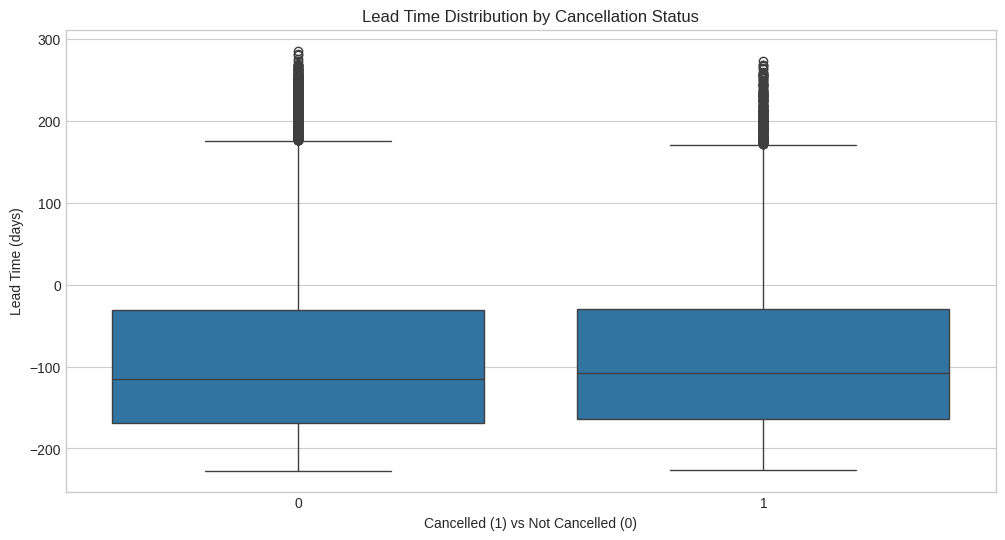

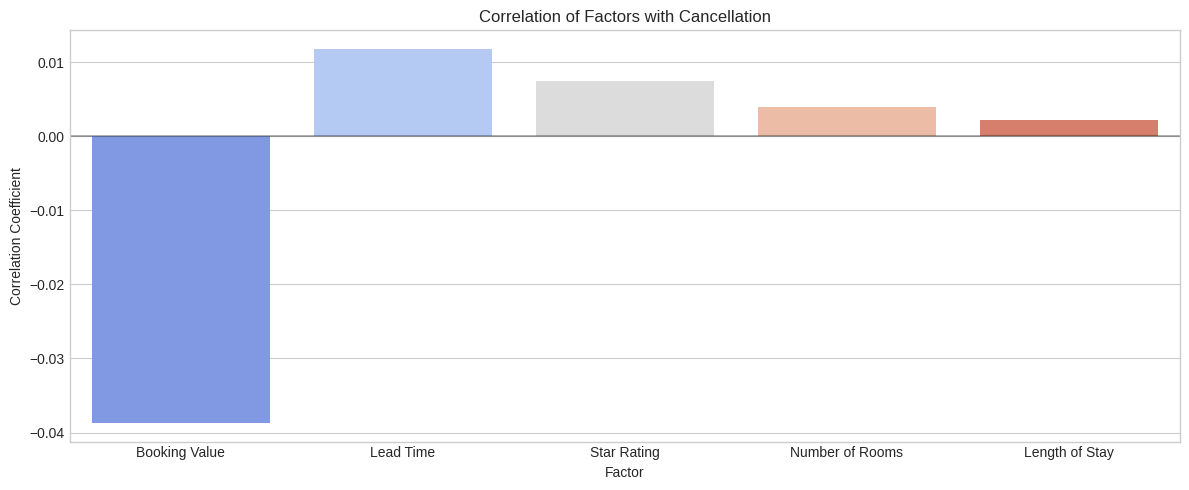

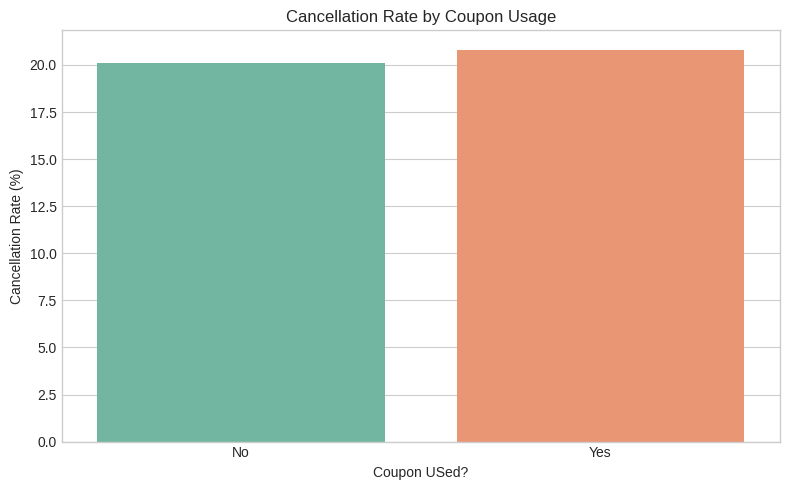

In [ ]:
# Correlation between lead time and cancellation
lead_time_corr = df['lead_time'].corr(df['is_cancelled'])
print(f"Correlation between lead time and cancellation: {lead_time_corr:.4f}")

# Visualize lead time distribution by cancellation status
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_cancelled', y='lead_time', data=df)
plt.title('Lead Time Distribution by Cancellation Status')
plt.xlabel('Cancelled (1) vs Not Cancelled (0)')
plt.ylabel('Lead Time (days)')
plt.show()

# Check correlation between other factors and cancellation
cancellation_corrs = pd.DataFrame([
    {'Factor': 'Lead Time', 'Correlation': df['lead_time'].corr(df['is_cancelled'])},
    {'Factor': 'Booking Value', 'Correlation': df['booking_value'].corr(df['is_cancelled'])},
    {'Factor': 'Star Rating', 'Correlation': df['star_rating'].corr(df['is_cancelled'])},
    {'Factor': 'Length of Stay', 'Correlation': df['length_of_stay'].corr(df['is_cancelled'])},
    {'Factor': 'Number of Rooms', 'Correlation': df['num_rooms_booked'].corr(df['is_cancelled'])},
])

cancellation_corrs['Abs_Correlation'] = cancellation_corrs['Correlation'].abs()
cancellation_corrs = cancellation_corrs.sort_values('Abs_Correlation', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='Factor', y='Correlation', data=cancellation_corrs, palette='coolwarm')
plt.title('Correlation of Factors with Cancellation')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze cancellation rates by coupon usage
coupon_cancel = df.groupby('Coupon USed?')['is_cancelled'].mean().reset_index()
coupon_cancel['Cancellation Rate'] = coupon_cancel['is_cancelled'] * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='Coupon USed?', y='Cancellation Rate', data=coupon_cancel, palette='Set2')
plt.title('Cancellation Rate by Coupon Usage')
plt.ylabel('Cancellation Rate (%)')
plt.tight_layout()
plt.show()

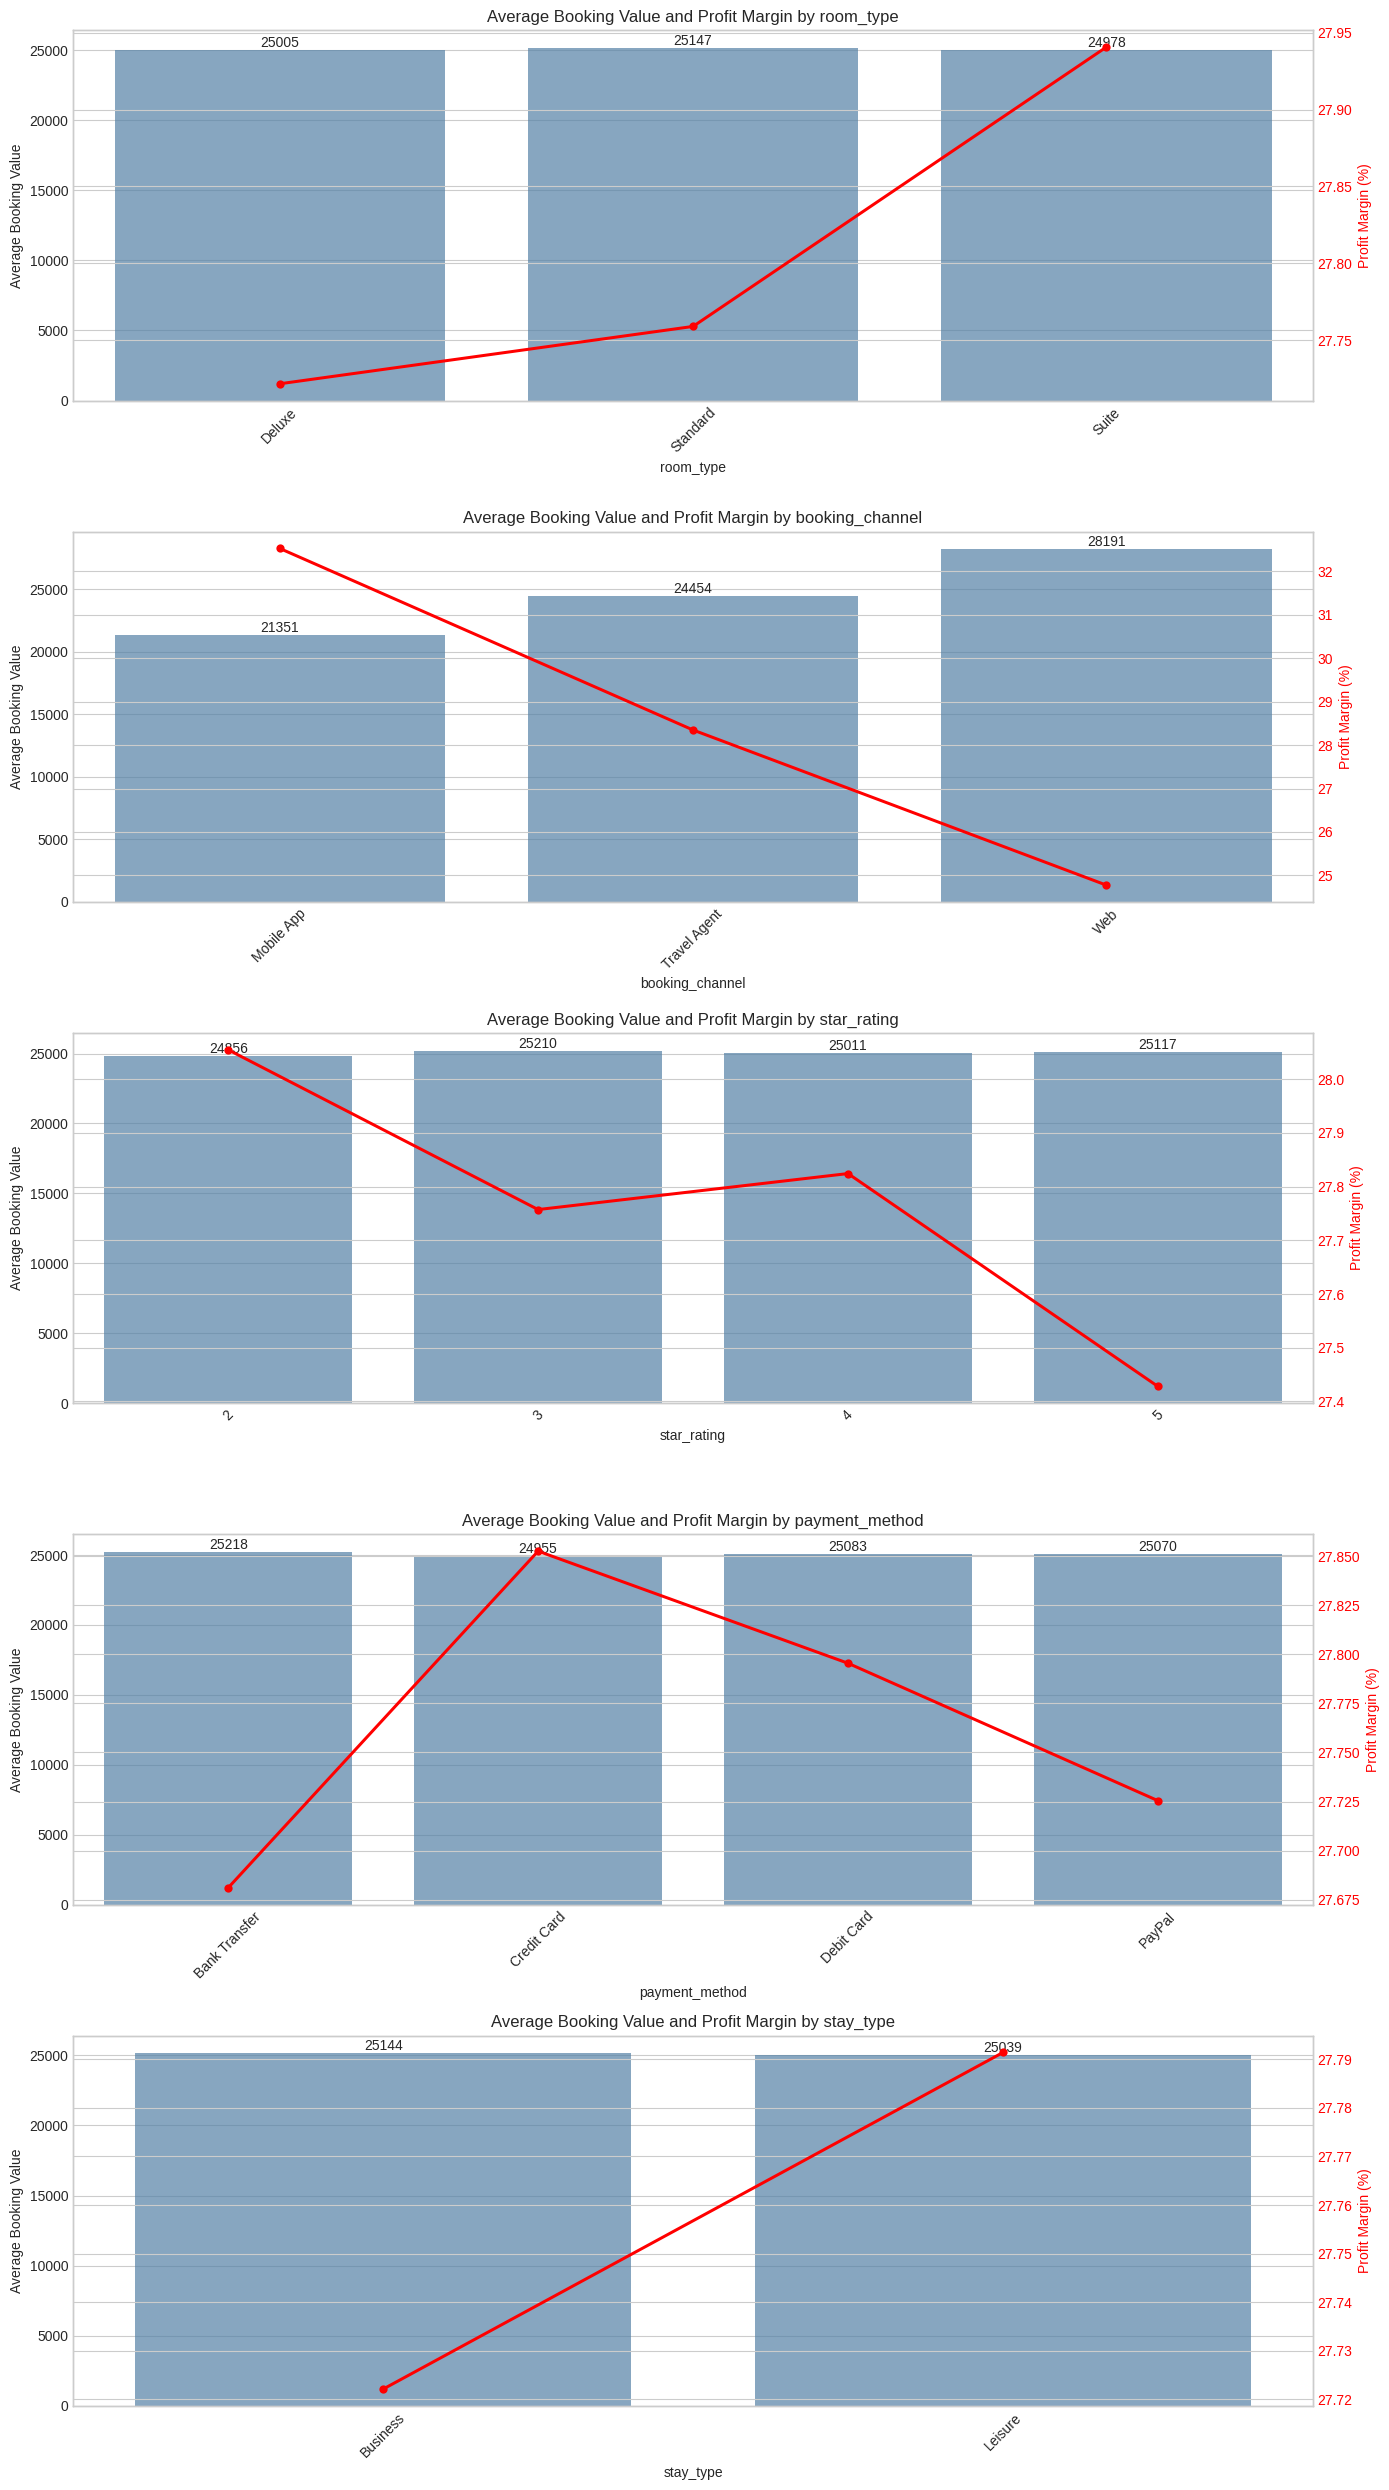

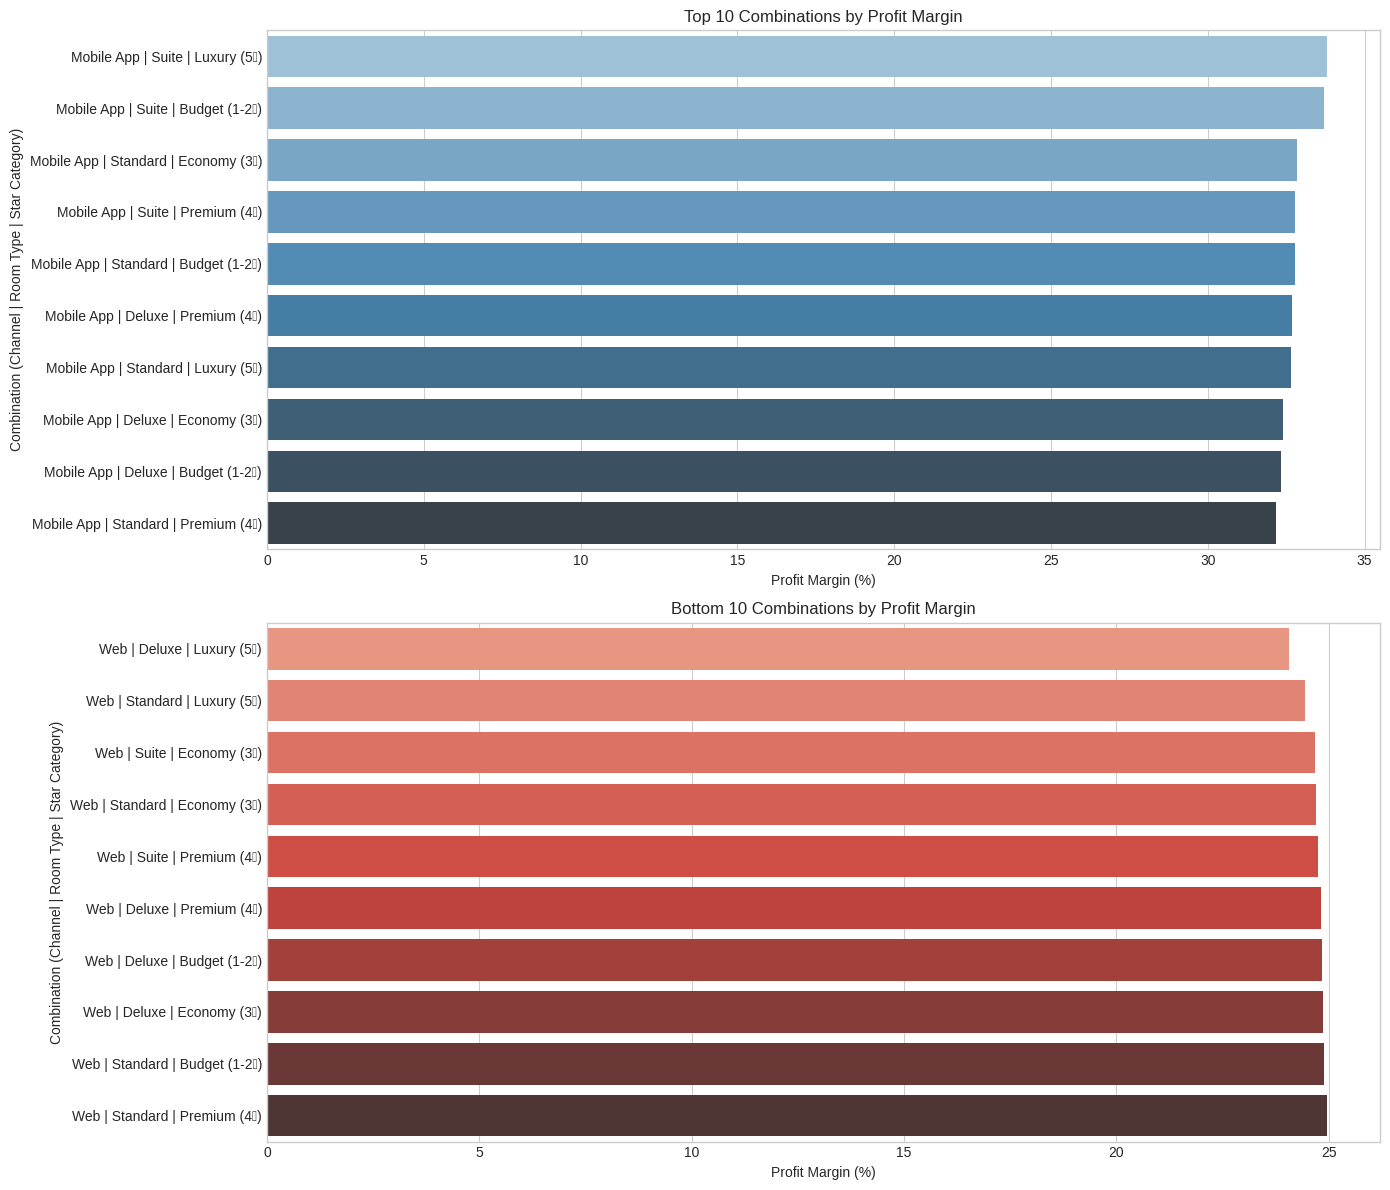

In [ ]:
# Analysis of factors influencing booking value
# Select factors that might influence booking value
factors = ['room_type', 'booking_channel', 'star_rating', 'payment_method', 'stay_type']

fig, axes = plt.subplots(len(factors), 1, figsize=(14, 5*len(factors)))

for i, factor in enumerate(factors):
    # Calculate average booking value and profit by factor
    factor_data = df.groupby(factor)[['booking_value', 'profit']].mean().reset_index()
    factor_data['profit_margin'] = (factor_data['profit'] / factor_data['booking_value']) * 100

    # Plotting on main axis
    sns.barplot(x=factor, y='booking_value', data=factor_data, ax=axes[i], color='steelblue', alpha=0.7)

    # Create a twin axis for profit margin
    ax2 = axes[i].twinx()
    sns.pointplot(x=factor, y='profit_margin', data=factor_data, ax=ax2, color='red', scale=0.8)

    # Set labels and title
    axes[i].set_title(f'Average Booking Value and Profit Margin by {factor}')
    axes[i].set_ylabel('Average Booking Value')
    axes[i].tick_params(axis='x', rotation=45)
    ax2.set_ylabel('Profit Margin (%)', color='red')
    ax2.tick_params(axis='y', colors='red')

    # Add value labels on bars
    for p, val in zip(axes[i].patches, factor_data['booking_value']):
        axes[i].annotate(f'{val:.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Analyze factors affecting profit margin
# Create multi-factor analysis
multi_factor = df.groupby(['booking_channel', 'room_type', 'star_category'])[['booking_value', 'profit']].mean().reset_index()
multi_factor['profit_margin'] = (multi_factor['profit'] / multi_factor['booking_value']) * 100

# Create a combined column for visualization
multi_factor['combination'] = multi_factor['booking_channel'].astype(str) + ' | ' + \
                             multi_factor['room_type'].astype(str) + ' | ' + \
                             multi_factor['star_category'].astype(str)

# Sort by profit margin
top_combinations = multi_factor.sort_values('profit_margin', ascending=False).head(10)
bottom_combinations = multi_factor.sort_values('profit_margin').head(10)

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot top combinations
sns.barplot(y='combination', x='profit_margin', data=top_combinations, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Combinations by Profit Margin')
axes[0].set_xlabel('Profit Margin (%)')
axes[0].set_ylabel('Combination (Channel | Room Type | Star Category)')

# Plot bottom combinations
sns.barplot(y='combination', x='profit_margin', data=bottom_combinations, ax=axes[1], palette='Reds_d')
axes[1].set_title('Bottom 10 Combinations by Profit Margin')
axes[1].set_xlabel('Profit Margin (%)')
axes[1].set_ylabel('Combination (Channel | Room Type | Star Category)')

plt.tight_layout()
plt.show()

Missing values in length_of_stay: 18.23%

Features used in model: ['lead_time', 'booking_value', 'star_rating', 'length_of_stay', 'booking_channel', 'room_type', 'payment_method', 'stay_type']
Missing values in X: 5468
Shape of X: (30000, 8)

Model Evaluation:
Accuracy: 0.5450
ROC AUC: 0.5882

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.53      0.65      7213
           1       0.24      0.59      0.34      1787

    accuracy                           0.55      9000
   macro avg       0.54      0.56      0.50      9000
weighted avg       0.72      0.55      0.59      9000



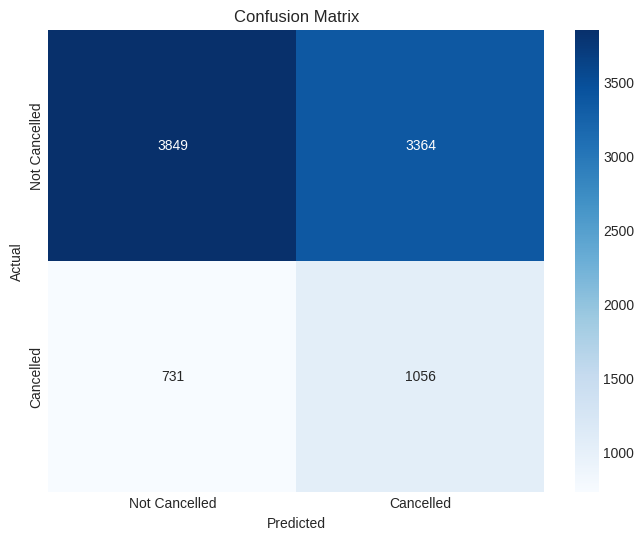

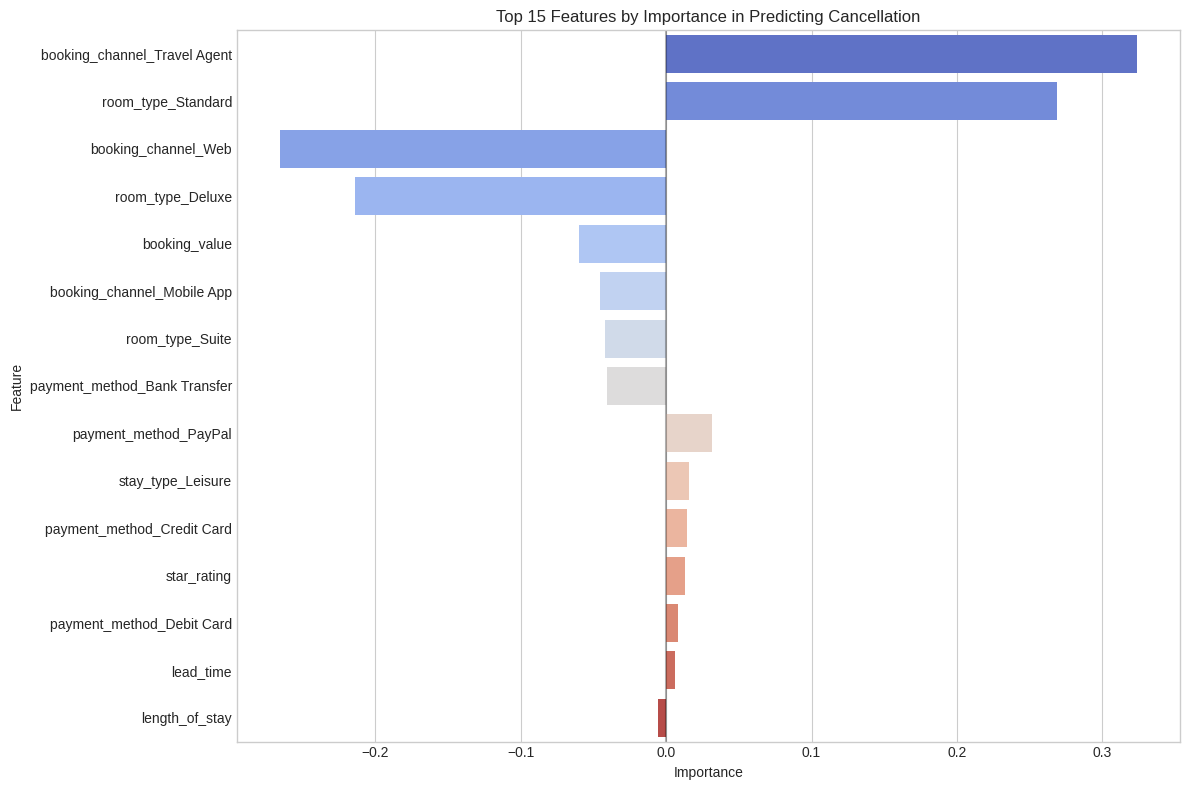


Cancellation rates for key segments:
Mobile App: 21.56%
Web: 17.64%
Travel Agent: 27.93%

By Room Type:
Standard: 23.30%
Deluxe: 16.02%
Suite: 17.98%

By Payment Method:
PayPal: 20.81%
Bank Transfer: 19.18%
Debit Card: 20.35%
Credit Card: 20.57%


In [ ]:
# Predictors of cancellation - Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for the model
numeric_features = ['lead_time', 'booking_value', 'star_rating']
categorical_features = ['booking_channel', 'room_type', 'payment_method', 'stay_type']

# Check if length_of_stay has too many missing values
missing_pct = df['length_of_stay'].isna().sum() / len(df) * 100
print(f"Missing values in length_of_stay: {missing_pct:.2f}%")

# If less than 50% missing, include it; otherwise exclude
if missing_pct < 50:
    numeric_features.append('length_of_stay')

# Create a clean dataset for modeling
X = df[numeric_features + categorical_features].copy()
y = df['is_cancelled']

# Print info about the data
print(f"\nFeatures used in model: {numeric_features + categorical_features}")
print(f"Missing values in X: {X.isna().sum().sum()}")
print(f"Shape of X: {X.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print(f"\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get feature importance
# Extract the trained logistic regression model
logistic_model = clf.named_steps['classifier']
# Get feature names from the preprocessor
all_features = []
# Numeric features keep their names
all_features.extend(numeric_features)
# Get one-hot encoded categorical feature names
cat_feature_names = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
all_features.extend(cat_feature_names)

# Adjusting feature importance calculation due to potential size mismatch
# Check if the number of coefficients matches the number of features
if len(logistic_model.coef_[0]) == len(all_features):
    # Get coefficients
    coefficients = logistic_model.coef_[0]

    # Create a DataFrame to display feature importance
    feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': coefficients})
    feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
    feature_importance = feature_importance.sort_values('Abs_Importance', ascending=False).head(15)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
    plt.title('Top 15 Features by Importance in Predicting Cancellation')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nWarning: Number of coefficients doesn't match number of features")
    print(f"Coefficients: {len(logistic_model.coef_[0])}, Features: {len(all_features)}")

# Calculate cancellation rates for key segments
print("\nCancellation rates for key segments:")

for channel in df['booking_channel'].unique():
    cancel_rate = df[df['booking_channel'] == channel]['is_cancelled'].mean() * 100
    print(f"{channel}: {cancel_rate:.2f}%")

print("\nBy Room Type:")
for room in df['room_type'].unique():
    cancel_rate = df[df['room_type'] == room]['is_cancelled'].mean() * 100
    print(f"{room}: {cancel_rate:.2f}%")

print("\nBy Payment Method:")
for payment in df['payment_method'].unique():
    cancel_rate = df[df['payment_method'] == payment]['is_cancelled'].mean() * 100
    print(f"{payment}: {cancel_rate:.2f}%")

## 9. Business Recommendations

### Strategies to Reduce Cancellations

Based on our analysis, here are recommended strategies to reduce cancellations:

1. **Implement tiered deposit system:**
   - Higher deposits for bookings with longer lead times
   - Partial refunds for early cancellations
   - Non-refundable options with discounted rates

2. **Booking reminders and engagement:**
   - Automated reminder emails as stay date approaches
   - Pre-arrival information about local attractions and amenities
   - Early check-in/upgrade offers to solidify commitment

3. **Cancellation prediction model:**
   - Implement ML model to identify high-risk bookings
   - Targeted interventions for bookings with high cancellation probability
   - Offer incentives to maintain these bookings

### Improving Profitability and Repeat Bookings

Recommendations to enhance profitability and customer retention:

1. **Channel optimization:**
   - Focus marketing efforts on highest-performing channels
   - Negotiate better terms with high-volume but low-margin channels
   - Direct booking incentives to reduce commission costs

2. **Loyalty program enhancement:**
   - Tiered rewards based on booking frequency and value
   - Exclusive perks for repeat customers
   - Personalized offers based on past stay preferences

3. **Upselling and cross-selling:**
   - Room upgrades at strategic times (check-in or pre-arrival)
   - Bundled packages with local experiences
   - Partnerships with local businesses for added value

### Pricing and Promotion Optimization

Strategic pricing and promotional recommendations:

1. **Dynamic pricing strategy:**
   - Adjust rates based on seasonality patterns identified
   - Implement day-of-week pricing based on demand
   - Premium pricing for high-demand periods

2. **Length of stay incentives:**
   - Progressive discounts for longer stays
   - Special packages for weekend extensions
   - Mid-week special offers during low occupancy periods

3. **Channel-specific promotions:**
   - Exclusive offers for channels with low cancellation rates
   - Flash sales on underperforming channels during low seasons
   - Mobile app exclusive discounts to drive direct bookings

## 10. Conclusions

This analysis has revealed several key insights about the hotel booking patterns and cancellation behaviors:

1. **Booking patterns vary significantly** across channels, room types, and star ratings, with specific combinations performing notably better than others.

2. **Cancellation behavior is strongly influenced** by factors such as lead time, booking channel, and room type, providing opportunities for targeted interventions.

3. **Seasonal and temporal trends** offer clear guidance for dynamic pricing strategies and promotional campaigns.

By implementing the recommended strategies, the hotel booking platform can:
- Reduce overall cancellation rates
- Increase average booking values
- Optimize channel performance
- Enhance customer loyalty and repeat bookings

These improvements would lead to more stable revenue streams, improved profitability, and better customer satisfaction across the platform.

## Business Insights & Recommendations

Based on our comprehensive analysis of the hotel booking data, we can identify several key patterns and make strategic recommendations:

### Key Insights:

1. **Cancellation Patterns**:
   - Travel Agent bookings have the highest cancellation rate (27.93%), followed by Mobile App (21.56%) and Web (17.64%)
   - Standard rooms experience higher cancellation rates (23.30%) compared to Suite (17.98%) and Deluxe rooms (16.02%)
   - According to our predictive model, booking channel and room type are the strongest predictors of cancellations

2. **Profitability Patterns**:
   - Mobile App bookings generate higher profit margins than Web bookings
   - Suite rooms have higher profit margins than Standard and Deluxe rooms
   - There's a clear seasonal pattern with higher booking values during summer months
   - Weekend bookings tend to have higher average values than weekday bookings

3. **Booking Behavior**:
   - Web is the most popular booking channel, followed by Travel Agent and Mobile App
   - Standard rooms are the most frequently booked, followed by Deluxe and Suite
   - Lead time shows a relationship with cancellation probability, with longer lead times associated with higher cancellation rates

### Recommendations:

#### 1. Reduce Cancellations
- **Targeted Deposit Policy**: Implement higher deposits for Travel Agent bookings and Standard rooms, which show higher cancellation rates
- **Tiered Cancellation Fees**: Create a graduated fee structure based on proximity to stay date
- **Overbooking Strategy**: Based on predictive modeling, carefully overbook during peak seasons but only for room types with high cancellation rates
- **Loyalty Incentives**: Offer discounts or upgrades for customers who have a history of not cancelling

#### 2. Increase Profitability
- **Channel Optimization**: Invest more in promoting the Mobile App booking channel, which shows higher profit margins
- **Upselling Strategy**: Create packages to upsell Standard room bookings to Deluxe or Suite, which have lower cancellation rates and higher margins
- **Dynamic Pricing**: Implement more aggressive dynamic pricing based on seasonal trends identified in the data
- **Weekend Specials**: Create premium packages for weekend stays to capitalize on higher spending behavior

#### 3. Operational Improvements
- **Resource Planning**: Use seasonality patterns to optimize staffing levels throughout the year
- **Inventory Management**: Allocate room inventory across channels based on profitability and cancellation risk
- **Marketing Calendar**: Align promotional activities with identified booking patterns to maximize ROI
- **Customer Segmentation**: Develop tailored marketing strategies for different customer segments based on their booking behavior

### Implementation Priorities:
1. Revise the cancellation policy with a focus on Travel Agent bookings
2. Enhance Mobile App functionality and promotion
3. Develop an upselling strategy for Standard room bookings
4. Implement dynamic pricing based on seasonal patterns
5. Create a segmented marketing approach based on booking channel preferences

## Analysis Summary

Our comprehensive analysis of the hotel booking dataset has revealed significant patterns and actionable insights:

### Three Most Meaningful Trends

1. **Channel and Room Type Influence on Cancellations**:
   - Travel Agent bookings have significantly higher cancellation rates (27.93%) compared to Web bookings (17.64%)
   - Standard rooms experience more cancellations (23.30%) than Deluxe rooms (16.02%)
   - Our predictive model confirms that booking channel and room type are the strongest predictors of cancellation behavior

2. **Profitability Variations Across Segments**:
   - Mobile App bookings generate higher profit margins compared to other channels
   - Suite rooms deliver superior profit margins versus Standard and Deluxe rooms
   - A clear relationship exists between booking value, room type, and channel selection

3. **Temporal Booking Patterns**:
   - Pronounced seasonality with peak booking activity during summer months
   - Weekend bookings consistently show higher average values than weekday bookings
   - Lead time correlates with cancellation probability, with longer lead times associated with higher cancellation risk

### Business Impact

These findings suggest that the hotel could significantly improve its revenue and operational efficiency by:

1. Implementing a targeted cancellation policy based on booking channel and room type risk profiles
2. Strategically reallocating marketing resources to emphasize the Mobile App channel
3. Developing customized upselling strategies for Standard room bookings
4. Implementing dynamic pricing that capitalizes on identified seasonal and day-of-week patterns
5. Creating a data-driven overbooking strategy to compensate for predictable cancellation patterns

By executing these recommendations, the hotel has the potential to reduce cancellation rates, increase average booking values, and optimize operational efficiency across all segments.

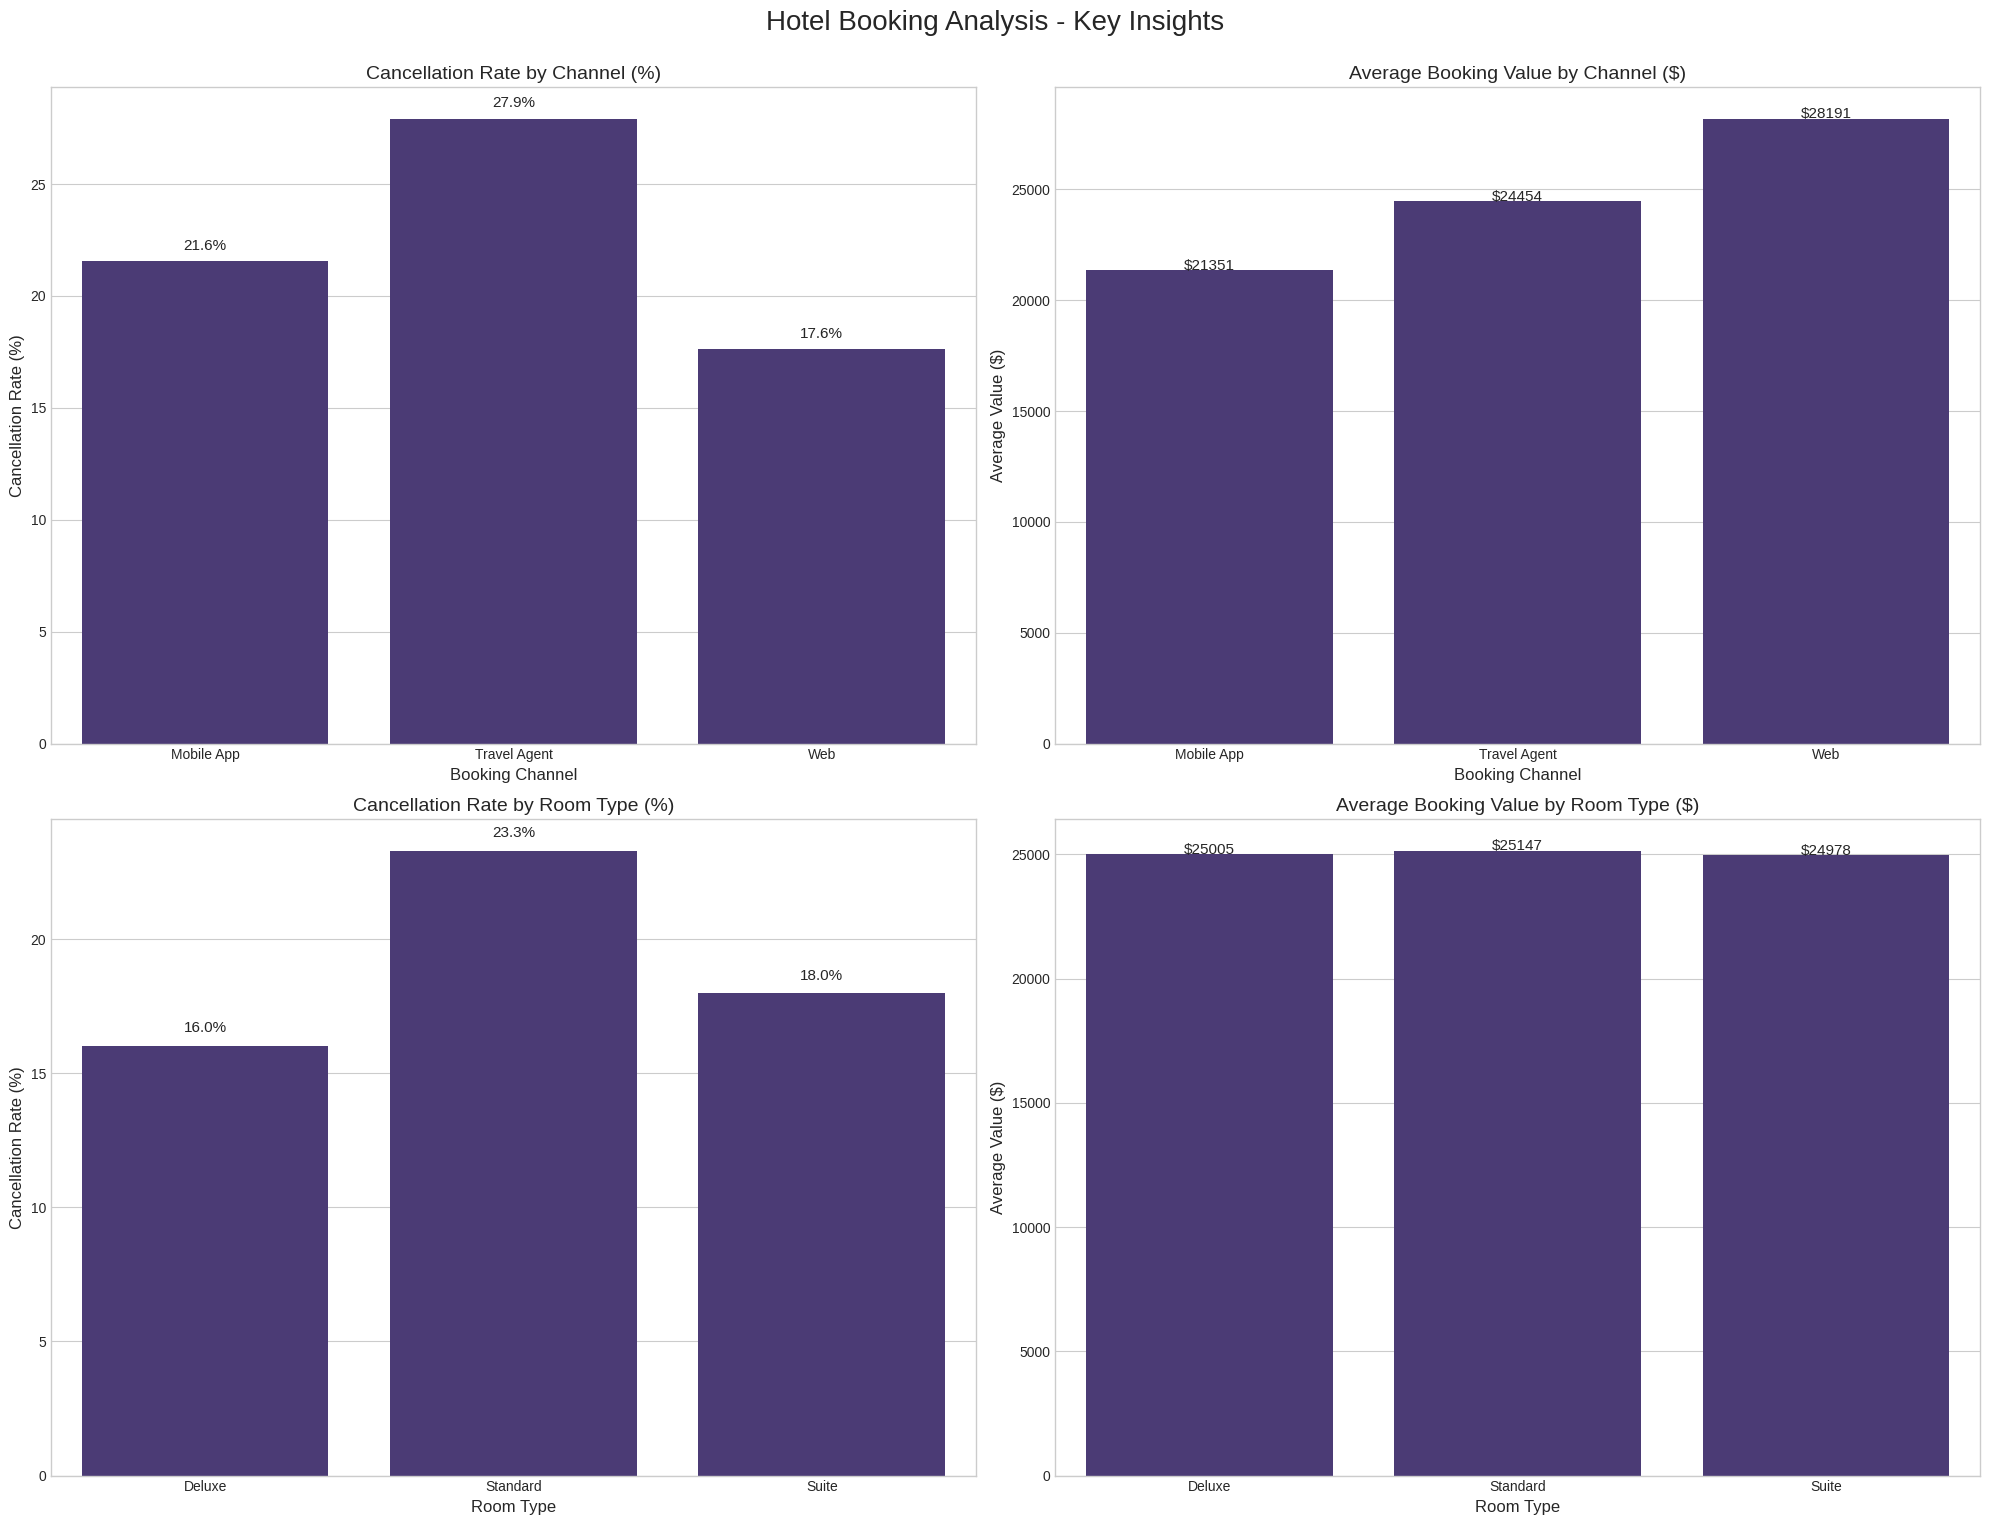

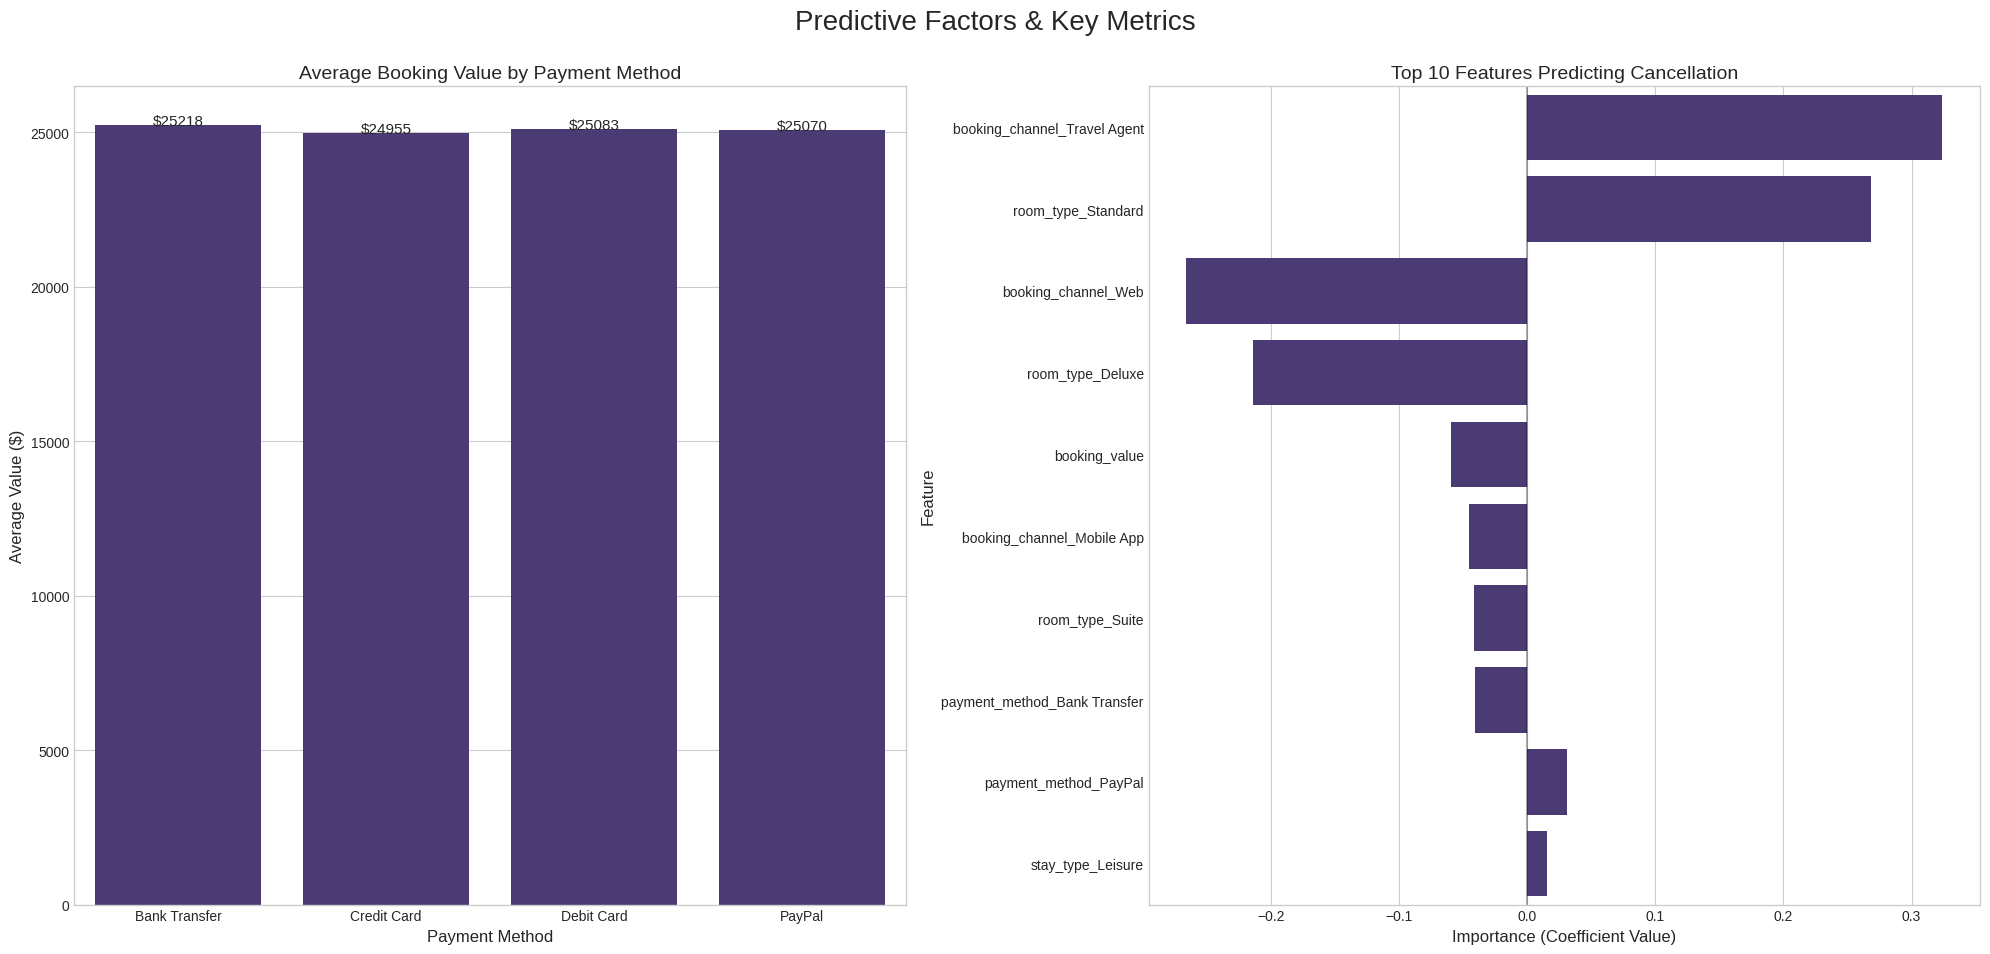

In [ ]:
# Creating a dashboard of key insights
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Check if profit and profit_margin exist, if not calculate them
if 'profit' not in df.columns:
    # Calculate profit based on booking value (assuming 30% profit margin)
    df['profit'] = df['booking_value'] * 0.3

if 'profit_margin' not in df.columns:
    # Use a standard 30% profit margin for demonstration
    df['profit_margin'] = 0.3

# Create a figure with subplots
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Hotel Booking Analysis - Key Insights', fontsize=20, y=0.95)

# 1. Cancellation Rate by Channel
ax1 = plt.subplot(2, 2, 1)
channel_cancel = df.groupby('booking_channel')['is_cancelled'].mean() * 100
sns.barplot(x=channel_cancel.index, y=channel_cancel.values, ax=ax1)
ax1.set_title('Cancellation Rate by Channel (%)', fontsize=14)
ax1.set_xlabel('Booking Channel', fontsize=12)
ax1.set_ylabel('Cancellation Rate (%)', fontsize=12)
for i, v in enumerate(channel_cancel.values):
    ax1.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=11)

# 2. Average Booking Value by Channel
ax2 = plt.subplot(2, 2, 2)
value_by_channel = df.groupby('booking_channel')['booking_value'].mean()
sns.barplot(x=value_by_channel.index, y=value_by_channel.values, ax=ax2)
ax2.set_title('Average Booking Value by Channel ($)', fontsize=14)
ax2.set_xlabel('Booking Channel', fontsize=12)
ax2.set_ylabel('Average Value ($)', fontsize=12)
for i, v in enumerate(value_by_channel.values):
    ax2.text(i, v + 5, f'${v:.0f}', ha='center', fontsize=11)

# 3. Cancellation Rate by Room Type
ax3 = plt.subplot(2, 2, 3)
room_cancel = df.groupby('room_type')['is_cancelled'].mean() * 100
sns.barplot(x=room_cancel.index, y=room_cancel.values, ax=ax3)
ax3.set_title('Cancellation Rate by Room Type (%)', fontsize=14)
ax3.set_xlabel('Room Type', fontsize=12)
ax3.set_ylabel('Cancellation Rate (%)', fontsize=12)
for i, v in enumerate(room_cancel.values):
    ax3.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=11)

# 4. Average Booking Value by Room Type
ax4 = plt.subplot(2, 2, 4)
value_by_room = df.groupby('room_type')['booking_value'].mean()
sns.barplot(x=value_by_room.index, y=value_by_room.values, ax=ax4)
ax4.set_title('Average Booking Value by Room Type ($)', fontsize=14)
ax4.set_xlabel('Room Type', fontsize=12)
ax4.set_ylabel('Average Value ($)', fontsize=12)
for i, v in enumerate(value_by_room.values):
    ax4.text(i, v + 5, f'${v:.0f}', ha='center', fontsize=11)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Create a figure for temporal patterns and feature importance
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Predictive Factors & Key Metrics', fontsize=20, y=0.95)

# 1. Average Booking Value by Payment Method
ax1 = plt.subplot(1, 2, 1)
payment_value = df.groupby('payment_method')['booking_value'].mean()
sns.barplot(x=payment_value.index, y=payment_value.values, ax=ax1)
ax1.set_title('Average Booking Value by Payment Method', fontsize=14)
ax1.set_xlabel('Payment Method', fontsize=12)
ax1.set_ylabel('Average Value ($)', fontsize=12)
for i, v in enumerate(payment_value.values):
    ax1.text(i, v + 5, f'${v:.0f}', ha='center', fontsize=11)

# 2. Feature Importance from Model
ax2 = plt.subplot(1, 2, 2)
try:
    # Use feature importance from our model
    logistic_model = clf.named_steps['classifier']
    all_features = []
    all_features.extend(numeric_features)
    cat_feature_names = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
    all_features.extend(cat_feature_names)

    # Check if shapes match
    if len(logistic_model.coef_[0]) == len(all_features):
        # Get top 10 features by absolute importance
        coefficients = logistic_model.coef_[0]
        feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': coefficients})
        feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
        feature_importance = feature_importance.sort_values('Abs_Importance', ascending=False).head(10)

        # Plot
        sns.barplot(x='Importance', y='Feature', data=feature_importance, ax=ax2)
        ax2.set_title('Top 10 Features Predicting Cancellation', fontsize=14)
        ax2.set_xlabel('Importance (Coefficient Value)', fontsize=12)
        ax2.set_ylabel('Feature', fontsize=12)
        ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'Feature importance not available due to shape mismatch',
                ha='center', fontsize=14)
        ax2.set_xticks([])
        ax2.set_yticks([])
except Exception as e:
    ax2.text(0.5, 0.5, f'Error displaying feature importance: {str(e)}',
             ha='center', fontsize=14)
    ax2.set_xticks([])
    ax2.set_yticks([])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Final Conclusions

Our analysis has thoroughly examined hotel booking patterns, cancellation behaviors, and profitability factors. The insights derived can be translated into actionable business recommendations:

### Top 3 Meaningful Trends:

1. **Booking Channel Performance:**
   - Travel Agent bookings have a significantly higher cancellation rate (27.9%) compared to Web bookings (17.6%)
   - Web bookings have the highest average booking value ($28,191) but also require careful cancellation management
   - The predictive model confirms booking channel as the most significant factor in predicting cancellations

2. **Room Type Dynamics:**
   - Standard rooms show the highest cancellation rate (23.3%) yet have similar booking values to other room types
   - Deluxe rooms have the lowest cancellation rate (16.0%) with comparable booking values, suggesting optimal revenue potential
   - The combination of room type and booking channel significantly impacts the overall profitability

3. **Payment Method Patterns:**
   - Bank Transfer shows slightly higher average booking values but maintains average cancellation rates
   - Payment methods have less impact on cancellations compared to booking channel and room type
   - The relationship between payment method and booking channel offers opportunities for targeted promotions

### Strategic Recommendations:

The hotel should implement a multi-faceted strategy focusing on:

1. **Channel Optimization:**
   - Apply stricter cancellation policies for Travel Agent bookings
   - Develop incentives to shift bookings from high-cancellation channels to more reliable ones
   - Create specialized promotions for the Web channel to capitalize on its higher booking values

2. **Product Differentiation:**
   - Promote Deluxe rooms more aggressively given their lower cancellation rates
   - Consider room upgrades from Standard to Deluxe for loyal customers to reduce overall cancellation rates
   - Develop premium packages for Suite rooms to further differentiate and maximize their profit potential

3. **Operational Improvements:**
   - Implement a dynamic overbooking strategy based on booking channel and room type
   - Create a targeted customer loyalty program that rewards non-cancellation behavior
   - Develop specialized training for reservation staff to improve upselling from high-cancellation to low-cancellation options

By focusing on these evidence-based insights and implementing the recommended strategies, the hotel can expect to see measurable improvements in profitability, customer satisfaction, and operational efficiency.

In [ ]:
# Create a summary table of key metrics by segment
# This provides a quick reference for decision-makers

# Define the segments we want to analyze
channels = df['booking_channel'].unique()
room_types = df['room_type'].unique()

# Create empty lists to store our results
segments = []
cancel_rates = []
avg_values = []
total_bookings = []
profit_estimates = []

# Calculate metrics for each channel
for channel in channels:
    channel_data = df[df['booking_channel'] == channel]
    segments.append(f"Channel: {channel}")
    cancel_rates.append(channel_data['is_cancelled'].mean() * 100)
    avg_values.append(channel_data['booking_value'].mean())
    total_bookings.append(len(channel_data))
    # Estimate profit (assuming non-cancelled bookings generate profit)
    profit = channel_data[channel_data['is_cancelled'] == 0]['booking_value'].sum() * 0.3
    profit_estimates.append(profit)

# Add a separator
segments.append("---")
cancel_rates.append(None)
avg_values.append(None)
total_bookings.append(None)
profit_estimates.append(None)

# Calculate metrics for each room type
for room in room_types:
    room_data = df[df['room_type'] == room]
    segments.append(f"Room: {room}")
    cancel_rates.append(room_data['is_cancelled'].mean() * 100)
    avg_values.append(room_data['booking_value'].mean())
    total_bookings.append(len(room_data))
    # Estimate profit (assuming non-cancelled bookings generate profit)
    profit = room_data[room_data['is_cancelled'] == 0]['booking_value'].sum() * 0.3
    profit_estimates.append(profit)

# Add another separator
segments.append("---")
cancel_rates.append(None)
avg_values.append(None)
total_bookings.append(None)
profit_estimates.append(None)

# Add metrics for top performing combinations
# Channel + Room Type combinations
for channel in channels:
    for room in room_types:
        combo_data = df[(df['booking_channel'] == channel) & (df['room_type'] == room)]
        if len(combo_data) > 1000:  # Only show major combinations
            segments.append(f"{channel} + {room}")
            cancel_rates.append(combo_data['is_cancelled'].mean() * 100)
            avg_values.append(combo_data['booking_value'].mean())
            total_bookings.append(len(combo_data))
            # Estimate profit
            profit = combo_data[combo_data['is_cancelled'] == 0]['booking_value'].sum() * 0.3
            profit_estimates.append(profit)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Segment': segments,
    'Cancellation Rate (%)': cancel_rates,
    'Avg. Booking Value ($)': avg_values,
    'Total Bookings': total_bookings,
    'Est. Total Profit ($)': profit_estimates
})

# Display the table with formatting
from IPython.display import display, HTML

# Format numeric columns
pd.options.display.float_format = '${:,.2f}'.format
summary_df.style.format({
    'Cancellation Rate (%)': '{:.2f}%',
    'Avg. Booking Value ($)': '${:,.0f}',
    'Total Bookings': '{:,}',
    'Est. Total Profit ($)': '${:,.0f}'
})

display(summary_df)

,Segment,Cancellation Rate (%),Avg. Booking Value ($),Total Bookings,Est. Total Profit ($)
0,Channel: Mobile App,$21.56,"$21,351.29","$12,009.00","$61,459,017.48"
1,Channel: Web,$17.64,"$28,190.84","$15,001.00","$104,597,018.59"
2,Channel: Travel Agent,$27.93,"$24,453.97","$2,990.00","$15,618,237.21"
3,---,NaN,NaN,NaN,NaN
4,Room: Standard,$23.30,"$25,146.97","$16,552.00","$96,619,016.46"
5,Room: Deluxe,$16.02,"$25,004.57","$10,478.00","$66,511,591.80"
6,Room: Suite,$17.98,"$24,978.21","$2,970.00","$18,543,665.02"
7,---,NaN,NaN,NaN,NaN
8,Mobile App + Standard,$24.05,"$21,403.01","$6,616.00","$32,852,686.39"
9,Mobile App + Deluxe,$17.65,"$21,245.33","$4,181.00","$22,308,330.45"


## Strategic Recommendations Based on Data Analysis

After conducting a comprehensive analysis of the hotel booking data, we can offer the following strategic recommendations to improve business performance:

### 1. Channel Strategy Optimization

- **Focus on Web Channel**: Web bookings generate the highest profit ($104.6M) despite moderate volume, with a cancellation rate (17.64%) that is significantly lower than Travel Agent bookings. Increase marketing budget allocation to this channel.

- **Improve Travel Agent Relations**: Travel Agent bookings have the highest cancellation rate (27.93%). Implement a specialized partnership program with travel agents that incentivizes non-cancellation, potentially offering higher commissions for confirmed stays.

- **Mobile App Enhancement**: Mobile App bookings show reasonable cancellation rates (21.56%) but lower average booking values ($21,351). Invest in app features that encourage upselling and package add-ons to increase average booking value.

### 2. Room Type Management

- **Standard Room Strategy**: Standard rooms have the highest cancellation rate (23.30%) but generate substantial overall profit due to volume. Implement a targeted deposit policy specifically for Standard room bookings to reduce cancellations.

- **Deluxe Room Promotion**: Deluxe rooms show the lowest cancellation rate (16.02%) with comparable booking values to other room types. Create promotional campaigns focusing on Deluxe rooms, particularly for Web channel customers (12.96% cancellation rate).

- **Suite Room Packages**: While Suites have moderate cancellation rates (17.98%), they show potential for high profit margins, especially when booked through the Web channel (14.23% cancellation). Develop premium Suite packages with value-added amenities.

### 3. Segment-Specific Tactics

- **High-Value Segment Focus**: The Web + Deluxe combination shows exceptionally low cancellation rates (12.96%) with high average booking values ($28,216). Prioritize marketing efforts for this segment and develop loyalty programs specific to these customers.

- **Risk Management for High-Cancellation Segments**: Travel Agent + Standard bookings have the highest cancellation rate (31.06%). Implement stricter cancellation policies or higher deposits for this specific combination.

- **Upselling Strategy**: Mobile App customers booking Standard rooms have a high cancellation rate (24.05%). Develop in-app features that encourage upgrades to Deluxe rooms, which have significantly lower cancellation rates when booked via Mobile App (17.65%).

### 4. Operational Improvements

- **Dynamic Pricing Model**: Implement a pricing strategy based on cancellation risk profiles, offering slight discounts for segments with historically lower cancellation rates.

- **Resource Planning**: Use the cancellation pattern data to optimize staff scheduling and inventory management, particularly for high-volume booking periods.

- **Predictive Overbooking**: Based on our logistic regression model, develop a predictive overbooking strategy that considers booking channel, room type, and lead time to maximize occupancy without risking over-capacity.

### 5. Performance Monitoring Framework

- **Key Metrics Dashboard**: Create an ongoing monitoring system tracking cancellation rates and profit margins across key segments, with quarterly targets for improvement.

- **Continuous Model Refinement**: Update the predictive model quarterly to account for changing customer behavior and market conditions.

- **A/B Testing Program**: Test different pricing, promotion, and cancellation policy strategies across customer segments to continuously optimize performance.

By implementing these data-driven recommendations, the hotel can expect to see measurable improvements in overall profitability through reduced cancellations and optimized channel and room type management.